# Анализ бизнес-показателей развлекательного приложения 

_____
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года: лог сервера с данными об их посещениях, выгрузка их покупок за этот период, рекламные расходы. Вам предстоит изучить: откуда приходят пользователи и какими устройствами они пользуются, сколько стоит привлечение пользователей из различных рекламных каналов; сколько денег приносит каждый клиент, когда расходы на привлечение клиента окупаются, какие факторы мешают привлечению клиентов.
    
_____
**Цель исследования:**

Провести анализ данных приложения, найти причины убытков компании и помочь выйти в плюс.
    
_____
**Задачи исследования:**

Выяснить откуда приходят пользователи и какими устройствами они пользуются, сколько стоит привлечение пользователей из различных рекламных каналов; сколько денег приносит каждый клиент, когда расходы на привлечение клиента окупаются, какие факторы мешают привлечению клиентов.
_____
**Исходные данные:**
    
- Таблица в формате csv: `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта

Структура :

User Id — уникальный идентификатор пользователя,

Region — страна пользователя,

Device — тип устройства пользователя,

Channel — идентификатор источника перехода,

Session Start — дата и время начала сессии,

Session End — дата и время окончания сессии.

- Таблица в формате csv: `orders_info_short.csv` — информация о заказах

Структура:

User Id — уникальный идентификатор пользователя,

Event Dt — дата и время покупки,

Revenue — сумма заказа.

- Таблица в формате csv: `costs_info_short.csv` — информацию о расходах на рекламу.

Структура:

dt — дата проведения рекламной кампании,

Channel — идентификатор рекламного источника,

costs — расходы на эту кампанию.
______

**Данное исследование разделим на несколько частей.**

***Часть 1. Изучение общей информации:***
* [1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)
* [2. Переименование столбцов.](#2-bullet)
* [2. Изменение типов данных.](#3-bullet)

***Часть 2. Функции для расчёта:***
* [1. Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии.](#4-bullet)

***Часть 3. Исследовательский анализ данных:***
* [1. Составление профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей.](#5-bullet)
* [2. Из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.](#6-bullet)
* [3. Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.](#7-bullet)
* [4. Изучение рекламных источников привлечения и определение каналов, из которых пришло больше всего платящих пользователей.](#8-bullet)

***Часть 4. Маркетинг:***
* [1. Общая сумма расходов на маркетинг.](#9-bullet)
* [2. Распределение трат по рекламным источникам.](#10-bullet)
* [3. Визуализация динамики изменения расходов во времени по каждому источнику.](#11-bullet)
* [4. Стоимость привлечения одного пользователя (CAC) из каждого источника.](#12-bullet)

***Часть 5. Оценка окупаемости рекламы:***
* [1. Общий анализ окупаемости рекламы.](#13-bullet)
* [2. Конверсия и удержание пользователей и динамика их изменений.](#14-bullet)
* [1. Анализ окупаемости рекламы с разбивкой по устройствам.](#15-bullet)
* [1. Анализ окупаемости рекламы с разбивкой по странам.](#16-bullet)
* [1. Анализ окупаемости рекламы с разбивкой по рекламным каналам.](#17-bullet)

***Часть 6. Общий вывод:***
* [1. Вывод.](#18-bullet)

## Изучение общей информации

### Изученеие файлов с данными, получение общей информации, загрузка библиотек

<a id="1-bullet"></a>

In [1]:
#импортируем библиотеки 
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [2]:
#читаем csv файлы 
try:
    visits, orders, costs = (
    pd.read_csv('/Users/denisbotvinovskii/Documents/bootcamp/project11/visits_info_short.csv'),  
    pd.read_csv('/Users/denisbotvinovskii/Documents/bootcamp/project11/orders_info_short.csv'),  
    pd.read_csv('/Users/denisbotvinovskii/Documents/bootcamp/project11/costs_info_short.csv')
)
except:
    visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  
    pd.read_csv('/datasets/orders_info_short.csv'),  
    pd.read_csv('/datasets/costs_info_short.csv')
)

In [3]:
#Выводим общую информацию о каждом датафрейме
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [5]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [6]:
#Выводим первые 5 строчек датафреймов
visits.head()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [7]:
orders.head()

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [8]:
costs.head()

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [9]:
#Посмотрим, есть ли в датафреймах явные дубликаты, используем методы duplicated() и sum()
visits.duplicated().sum()

0

In [10]:
orders.duplicated().sum()

0

In [11]:
costs.duplicated().sum()

0

Явных дубликатов нет

### Переименование столбцов

<a id="2-bullet"></a>

In [12]:
#Переименуем столбцы в наших датафреймах, приведем к необходимому стилистичекому виду
visits = visits.rename(columns={'User Id': 'user_id', 
                                'Region': 'region', 
                                'Device': 'device', 
                                'Channel': 'channel', 
                                'Session Start': 'session_start', 
                                'Session End': 'session_end'})

orders = orders.rename(columns={'User Id': 'user_id', 
                                'Event Dt': 'event_dt', 
                                'Revenue': 'revenue'})

costs = costs.rename(columns={'Channel': 'channel'})

### Изменение типов

<a id="3-bullet"></a>

In [13]:
#Преобразуем данные в нужные типы, нам необходимо привести столбцы с датами к соответствующему типу
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date #.dt.date?

**Вывод:**
Изучили общую информацию о трех датасетах:

Первый - visits хранит лог сервера с информацией о посещениях сайта, в котором 6 столбцов и 309901 строк;

второй - orders хранит информацию о заказах, в котором 3 столбца и 40212 строк;

третий - costs хранит информацию о расходах на рекламу, в котором 3 столбца и 1800 строк.

В данном разделе мы установили отсутствие явных дубликатов, также пропусков в данных, импортировали нужные библиотеки, переименовали столбцы, изменили некоторые типы данных для дальнейшей работы с ними.

## Функции для расчёта

### Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии

<a id="4-bullet"></a>

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [14]:
#Задаем функцию для создания профилей пользователей get_profiles()

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [15]:
# функция для расчёта удержания Retention Rate - get_retention() 

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [16]:

# функция для расчёта конверсии - get_conversion()

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [17]:
# функция для расчёта LTV и ROI - get_ltv()

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [18]:
# функция для сглаживания фрейма - filter_data()

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [19]:
# функция для визуализации удержания - plot_retention()

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [20]:
# функция для визуализации конверсии - plot_conversion()

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [21]:
# функция для визуализации LTV и ROI - plot_ltv_roi()

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Вывод:**

В данном разделе мы задали функции для вычисления значений метрик: `get_profiles()`, `get_retention()`, `get_conversion()`, `get_ltv()`. А также функции для построения графиков: `filter_data()`, `plot_retention()`, `plot_conversion()`, `plot_ltv_roi`.

## Исследовательский анализ данных


### Составление профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей.

<a id="5-bullet"></a>

In [22]:
#Составим профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [23]:
#Определим минимальную и максимальную даты привлечения пользователей.
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()

print(min_date)
max_date

2019-05-01


datetime.date(2019, 10, 27)

**Вывод:**

Минимальная дата: 1 мая 2019 года

Максимальная дата: 27 октября 2019 года

Найденные даты привлечения пользователей в данных соответствуют ТЗ: с 1 мая по 27 октября 2019 года

### Из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 

<a id="6-bullet"></a>

In [24]:
#Создадим сводную таблицу по странам пользователей и найдем количество платящих и не плотящих, а также общее количество
region_table = profiles.pivot_table(index='region', columns='payer', values='user_id', aggfunc='nunique')
region_table['total'] = region_table.sum(axis='columns')
region_table

payer          False  True   total
region                            
France         16787   663   17450
Germany        14365   616   14981
UK             16875   700   17575
United States  93100  6902  100002

In [25]:
#Найдем долю платящих из каждой страны, для этого создадим сводную таблицу по странам, где посчитаем среднее 
#значение в столбце 'payer'
p= profiles.pivot_table(index='region', values='payer', aggfunc='mean')
p

payer
region                 
France         0.037994
Germany        0.041119
UK             0.039829
United States  0.069019

In [26]:
#Переведем долю платящих в проценты и переименуем столбец
p['payer'] = round(p['payer'] * 100, 2)
p.columns = ['share']
p

share
region              
France          3.80
Germany         4.11
UK              3.98
United States   6.90

In [27]:
#Теперь соединим таблицы в одну по столбцу 'region'
region_table = region_table.merge(p, on='region')
region_table.sort_values(by='total',ascending=False)

False  True   total  share
region                                   
United States  93100  6902  100002   6.90
UK             16875   700   17575   3.98
France         16787   663   17450   3.80
Germany        14365   616   14981   4.11

**Вывод:**

Пользователи приходят в приложение из стран: Франция (France), Германия (Germany), Великобритания (UK), Соединенные Штаты Америки (United States). На Соединенные Штаты Америки приходится больше всего платящих пользователей, также доля платящих в этой стране самая большая, 6.9%. Хуже всего приходят пользователи из Германии, однако по доле платящих она на втором месте, наименьшая доля у Франции.

### Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи

<a id="7-bullet"></a>

In [28]:
#Создадим сводную таблицу по устройствам пользователей и найдем количество платящих и не плотящих, 
#а также общее количество
device_table = profiles.pivot_table(index='device', columns='payer', values='user_id', aggfunc='nunique')
device_table['total'] = device_table.sum(axis='columns')
device_table

payer    False  True  total
device                     
Android  32982  2050  35032
Mac      28130  1912  30042
PC       28918  1537  30455
iPhone   51097  3382  54479

In [29]:
#Найдем долю платящих каждого устройства, для этого создадим сводную таблицу по устройству, где посчитаем среднее 
#значение в столбце 'device'
d= profiles.pivot_table(index='device', values='payer', aggfunc='mean')
d

payer
device           
Android  0.058518
Mac      0.063644
PC       0.050468
iPhone   0.062079

In [30]:
#Переведем долю платящих в проценты и переименуем столбец
d['payer'] = round(d['payer'] * 100, 2)
d.columns = ['share']
d

share
device        
Android   5.85
Mac       6.36
PC        5.05
iPhone    6.21

In [31]:
#Теперь соединим таблицы в одну по столбцу 'device'
device_table = device_table.merge(d, on='device')
device_table.sort_values(by='total',ascending=False)

False  True  total  share
device                            
iPhone   51097  3382  54479   6.21
Android  32982  2050  35032   5.85
PC       28918  1537  30455   5.05
Mac      28130  1912  30042   6.36

**Вывод:**

Клиенты пользуются устройствами: iPhone, Android, PC, Mac. Больше всего платящих пользователей приходится на iPhone, доля платящих с этого устройства примерно 6.2%, однако это не самая большая. Лучший показатель у клиентов с утройствами Mac, примерно 6.4%, но таких пользователей наименьшее количество. 

### Изучение рекламных источников привлечения и определение каналов, из которых пришло больше всего платящих пользователей

<a id="8-bullet"></a>

In [32]:
#Создадим сводную таблицу по рекламным источникам и найдем количество платящих и не плотящих, а также общее количество
channel_table = profiles.pivot_table(index='channel', columns='payer', values='user_id', aggfunc='nunique')
channel_table['total'] = channel_table.sum(axis='columns')
channel_table

payer               False  True  total
channel                               
AdNonSense           3440   440   3880
FaceBoom            25587  3557  29144
LeapBob              8291   262   8553
MediaTornado         4208   156   4364
OppleCreativeMedia   8372   233   8605
RocketSuperAds       4096   352   4448
TipTop              17683  1878  19561
WahooNetBanner       8100   453   8553
YRabbit              4147   165   4312
lambdaMediaAds       1924   225   2149
organic             55279  1160  56439

In [33]:
#Найдем долю платящих каждого рекламного источника, для этого создадим сводную таблицу по устройству, где посчитаем 
#среднее значение в столбце 'channel'
c= profiles.pivot_table(index='channel', values='payer', aggfunc='mean')
c

payer
channel                     
AdNonSense          0.113402
FaceBoom            0.122049
LeapBob             0.030633
MediaTornado        0.035747
OppleCreativeMedia  0.027077
RocketSuperAds      0.079137
TipTop              0.096007
WahooNetBanner      0.052964
YRabbit             0.038265
lambdaMediaAds      0.104700
organic             0.020553

In [34]:
#Переведем долю платящих в проценты и переименуем столбец
c['payer'] = round(c['payer'] * 100, 2)
c.columns = ['share']
c

share
channel                  
AdNonSense          11.34
FaceBoom            12.20
LeapBob              3.06
MediaTornado         3.57
OppleCreativeMedia   2.71
RocketSuperAds       7.91
TipTop               9.60
WahooNetBanner       5.30
YRabbit              3.83
lambdaMediaAds      10.47
organic              2.06

In [35]:
#Теперь соединим таблицы в одну по столбцу 'channel'
channel_table = channel_table.merge(c, on='channel')
channel_table.sort_values(by='total',ascending=False)

False  True  total  share
channel                                      
organic             55279  1160  56439   2.06
FaceBoom            25587  3557  29144  12.20
TipTop              17683  1878  19561   9.60
OppleCreativeMedia   8372   233   8605   2.71
LeapBob              8291   262   8553   3.06
WahooNetBanner       8100   453   8553   5.30
RocketSuperAds       4096   352   4448   7.91
MediaTornado         4208   156   4364   3.57
YRabbit              4147   165   4312   3.83
AdNonSense           3440   440   3880  11.34
lambdaMediaAds       1924   225   2149  10.47

**Вывод:**

Рекамные источники, из которых пришло больше всего платящих пользователей: 'FaceBoom' (с наибольшей долей платящих примерно 12.2%), 'TipTop' (9.6%) и 'organic', однако доля платящих у последних очень низкая 2%. Также высокий процет платящих у 'AdNonSense' (11.3%) и 'lambdaMediaAds' (10.5%).

**Вывод по разделу:** в данном разделе мы:

- Составили профили пользователей, 
- Определили, что минимальная и максимальная даты привлечения клиентов в данных соответствуют нашему ТЗ. 
- Выяснили, что пользователи приходят в приложение из следующих стран:  Франция, Германия, Великобритания, Соединенные Штаты Америки. Больше всего платящих пользователей приходится на Соединенные Штаты.
- Выяснили, что клиенты пользуются устройствами: iPhone, Android, PC, Mac. Больше всего платящих пользователей приходится на iPhone.
- Изучили рекламные источники привлечения и определили каналы, из которых пришло больше всего платящих пользователей: FaceBoom, TipTop и organic.

## Маркетинг

### Общая сумма расходов на маркетинг

<a id="9-bullet"></a>

In [36]:
round(costs['costs'].sum(), 1)

105497.3

**Вывод:** Общая сумма расходов на маркетинг составила 105497.3$

### Распределение трат  по рекламным источникам

<a id="10-bullet"></a>

In [37]:
#Создадим сводную таблицу по каналам и посчитаем сумму вложений в каждый источник
costs.pivot_table(index='channel', values='costs', aggfunc='sum').sort_values(by='costs', ascending=False)

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22

**Вывод:** Больше всего вложений в рекламы было по каналам: 'TipTop', 'FaceBoom', 'WahooNetBanner'. Меньше всего потратились на рекламный источник 'YRabbit'.

### Визуализация динамики изменения расходов во времени по каждому источнику

<a id="11-bullet"></a>

In [38]:
#Чтобы не менять формат данных в искодном столбце, он нам потребуется для дальнейшей работы, создадим новый
costs['dt_d'] = pd.to_datetime(costs['dt'])

In [39]:
#Вычленим из столбца с датой нужные нам недели и месяцы
costs['week'] = costs['dt_d'].dt.isocalendar().week
costs['month'] = costs['dt_d'].dt.month
costs.head()

dt   channel  costs       dt_d  week  month
0  2019-05-01  FaceBoom  113.3 2019-05-01    18      5
1  2019-05-02  FaceBoom   78.1 2019-05-02    18      5
2  2019-05-03  FaceBoom   85.8 2019-05-03    18      5
3  2019-05-04  FaceBoom  136.4 2019-05-04    18      5
4  2019-05-05  FaceBoom  122.1 2019-05-05    18      5

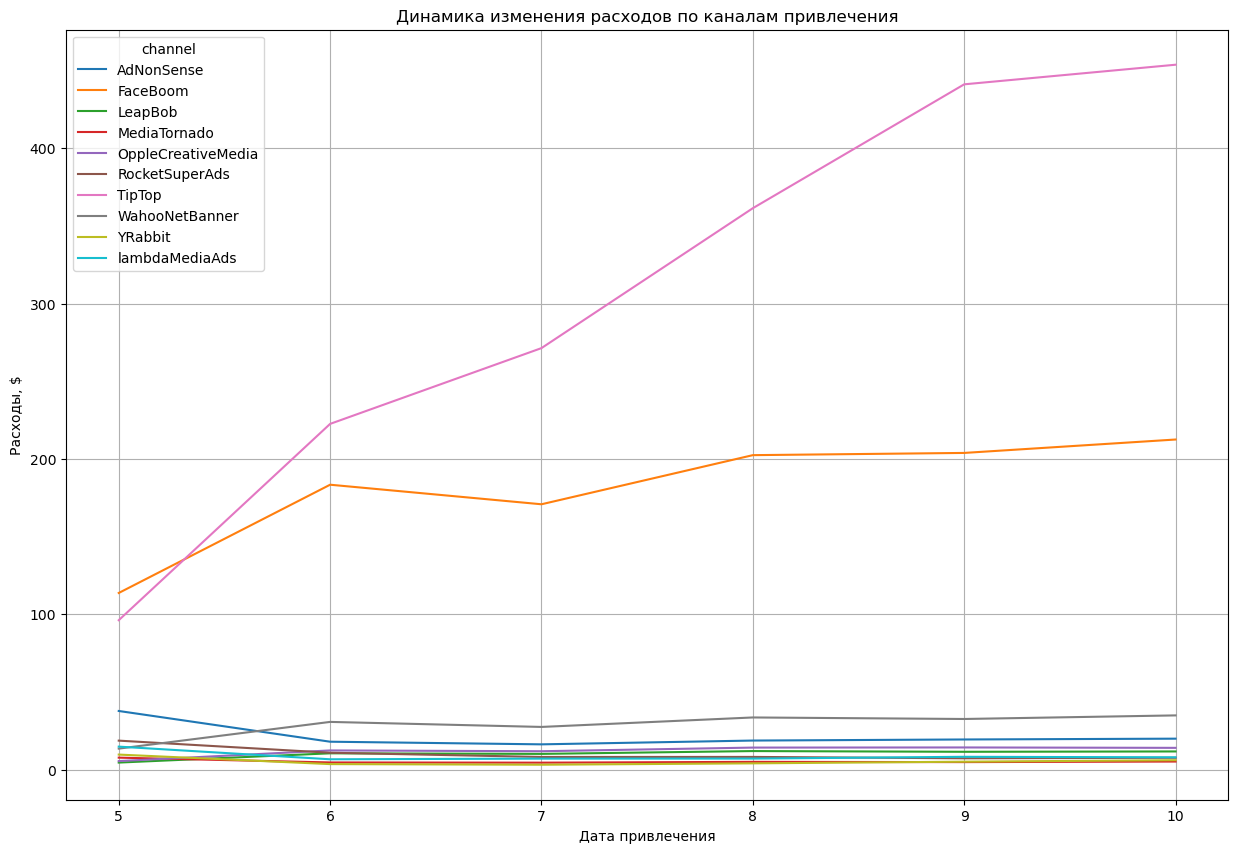

In [40]:
#Строим график изменения расходов, группируем по месяцу, также по каналам привлечения и находим среднее 
costs_pivot = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='mean')
costs_pivot.plot(grid=True, figsize=(15, 10))
plt.ylabel('Расходы, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика изменения расходов по каналам привлечения');

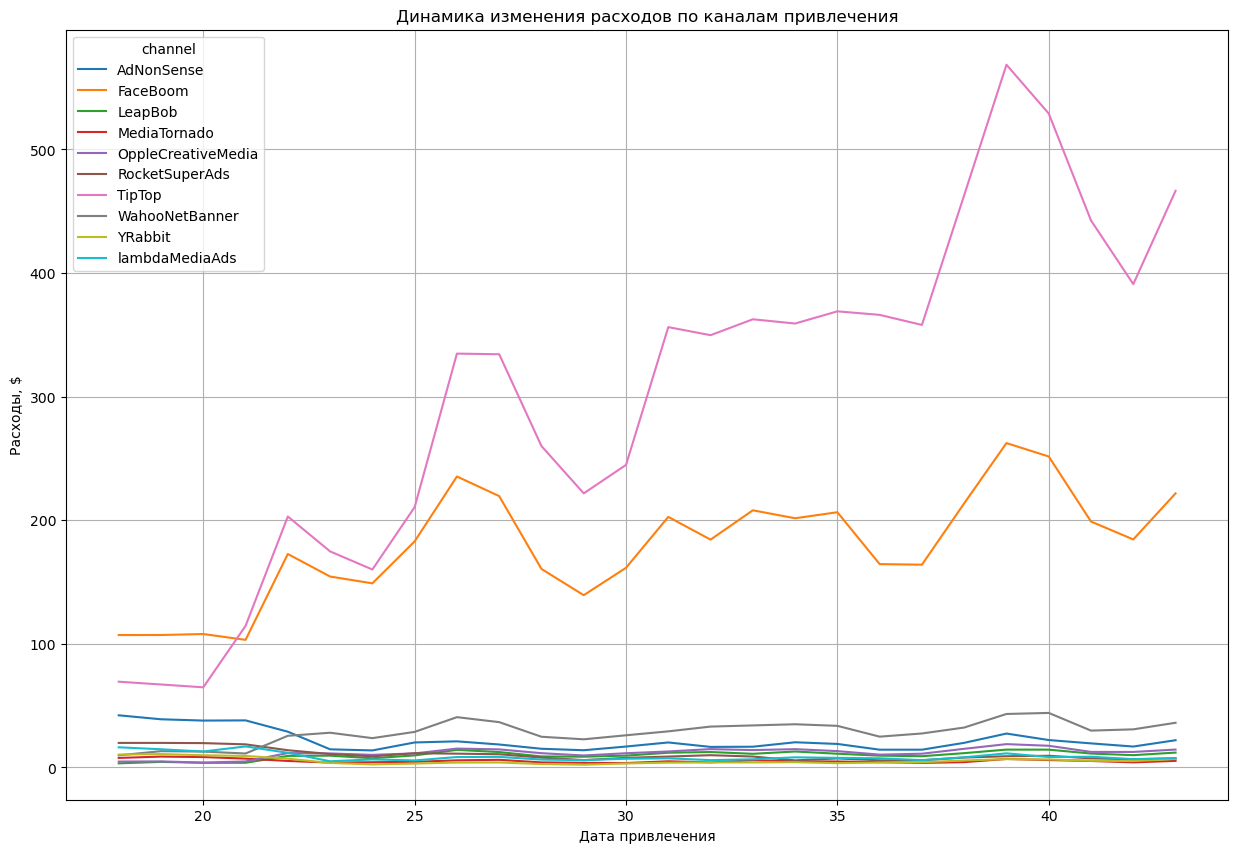

In [41]:
#Строим график изменения расходов, группируем по неделе, также по каналам привлечения и находим среднее 
costs_pivot = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='mean')
costs_pivot.plot(grid=True, figsize=(15, 10))
plt.ylabel('Расходы, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика изменения расходов по каналам привлечения');

**Вывод:** 
Как видно из графиков наибольшие вложения были сделаны в рекламные источники 'TipTop', 'FaceBoom', лидирует первый. Расходы на них постепенно увеличивались со временем и были симметричны относительно друг друга. Существенный рост затрат происходил с июня по сентябрь. Также заметны несколько характерных пиков на 22, 26-27 и 39 неделях. Остальные каналы привлечения пользователей финансировались меньшим образом и более равномерно.

### Стоимость привлечения одного пользователя (CAC) из каждого источника

<a id="12-bullet"></a>

In [42]:
#Используем уже созданную таблицу по профилям пользователей profiles, разделим на каналы и посчитаем средную стоимость 
#привлечения одного покупателя acquisition_cost
cac = profiles.pivot_table(
    index='channel', values='acquisition_cost', aggfunc='mean'
).sort_values(by='acquisition_cost', ascending=False)
cac

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

In [43]:
#посчитаем средний САС по проекту
cac_mean = round(cac['acquisition_cost'].mean(), 2)
cac_mean

0.69

**Вывод:** Наибольшая средняя стоимость привлечения одного пользователя (CAC) у рекламного источника 'TipTop'. САС у 'FaceBoom' и 'AdNonSense' в 2 с половиной раза ниже. Наименьший показатель у 'LeapBob'. Средний САС по всем каналам равен 0.69

**Вывод по разделу:** в данном разделе мы:

- Нашли общую сумму расходов на маркетинг - 105497.3
- Выяснили, как траты распределены по рекламным источникам: 

Больше всего вложений в рекламу было по каналам: 'TipTop', 'FaceBoom', 'WahooNetBanner'. Меньше всего потратились на рекламный источник 'YRabbit'.
- Узнали изменения расходов во времени (по неделям и месяцам) по каждому источнику: 

Для канлов 'TipTop' и 'FaceBoom' существенный рост затрат происходил с июня по сентябрь. Также заметны несколько характерных пиков на 22, 26-27 и 39 неделях. Остальные каналы привлечения пользователей финансировались меньшим образом и более равномерно.
- Выяснили среднюю стоимость привлечения одного пользователя (CAC) у каждого рекламного источника:

Наибольшая у 'TipTop' (2.8), что почти в два раза выше, чем у 'FaceBoom' и 'AdNonSense'. Средний САС по всем каналам равен 0.69

## Оцените окупаемость рекламы

### Общий анализ окупаемости рекламы

<a id="13-bullet"></a>

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

In [44]:
#Зададим момент и горизонт анализа
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

In [45]:
#исключаем пользователей с органическим трафиком
profiles = profiles.query('channel != "organic"')

In [46]:
# считаем LTV и ROI с помощью функции get_ltv()
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

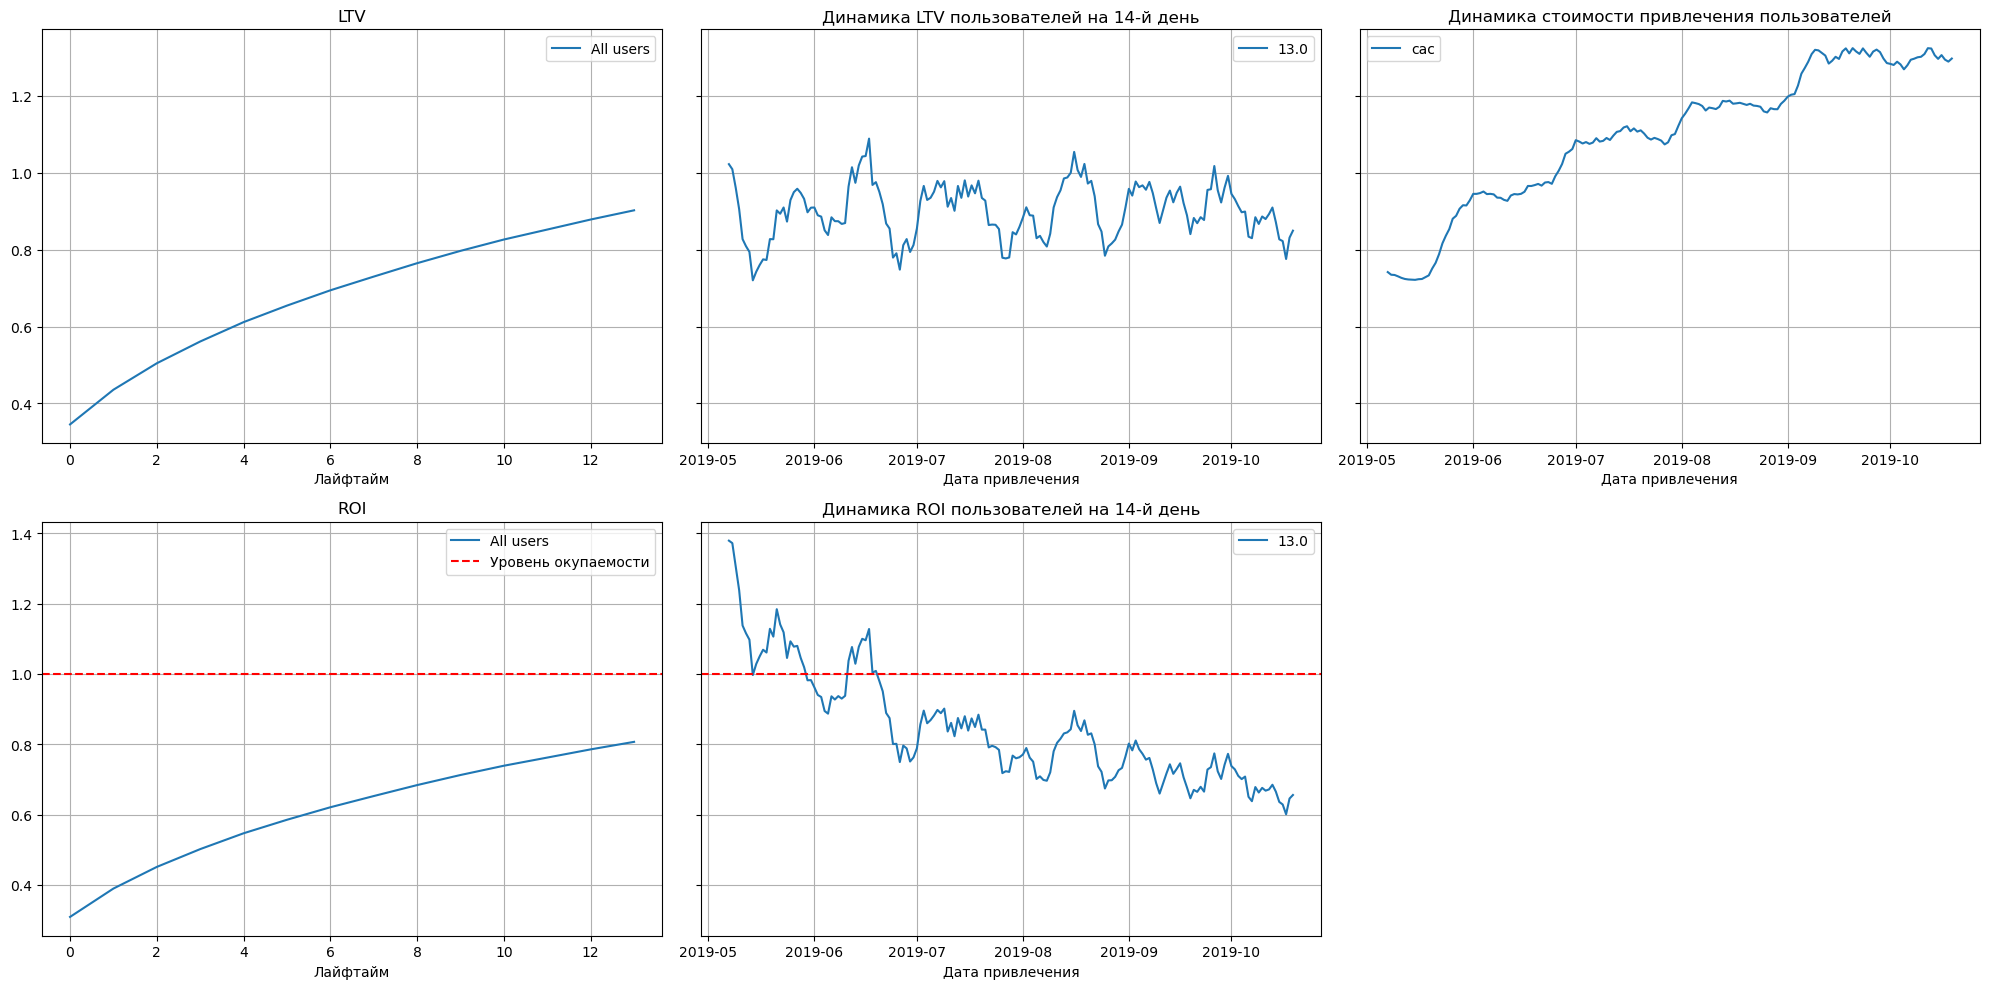

In [47]:
# строим графики с помощью функции plot_ltv_roi()
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод:** По графикам можно сделать такие выводы:

Реклама не окупается. Наблюдаем, что динамика ROI за лайфтайм падает. При относительно стабильной динамике LTV, динамика САС растёт с мая по конец октября. Эту закономерность мы наблюдаем в динамике ROI, что при сильном увеличении САС, в равной степени падает динамика ROI пользователей.

### Конверсия и удержание пользователей и динамика их изменений

<a id="14-bullet"></a>

In [48]:
# найдем конверсию с помощью функции get_conversion()
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

Text(0.5, 1.0, 'Тепловая карта конверсии')

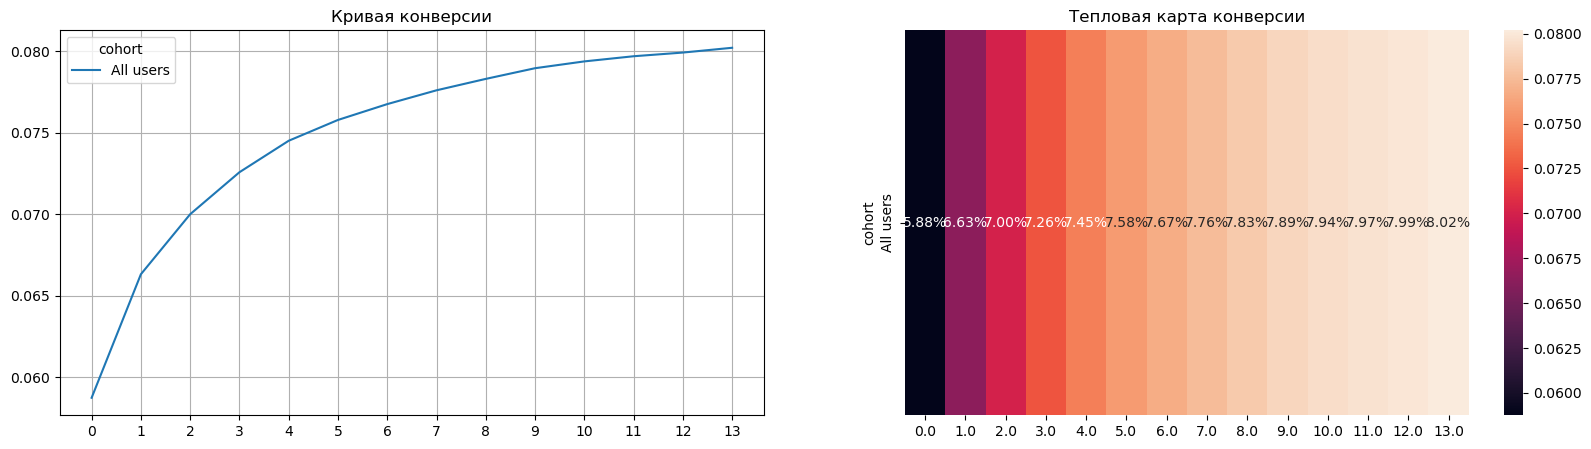

In [49]:
# Построим графики конверсии
plt.figure(figsize=(20, 5)) # размер сетки для графиков

# в одной ячейке — кривые конверсии
report = conversion.drop(columns=['cohort_size'])

# построим кривые конверсии
report.T.plot(grid=True, xticks=list(report.columns.values), ax=plt.subplot(1,2,1))
plt.title('Кривая конверсии')
# построим тепловую карту
sns.heatmap(report, annot=True, fmt='.2%', ax=plt.subplot(1,2,2))
plt.title('Тепловая карта конверсии')


In [50]:
# найдем удержание с помощью функции get_retention()
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

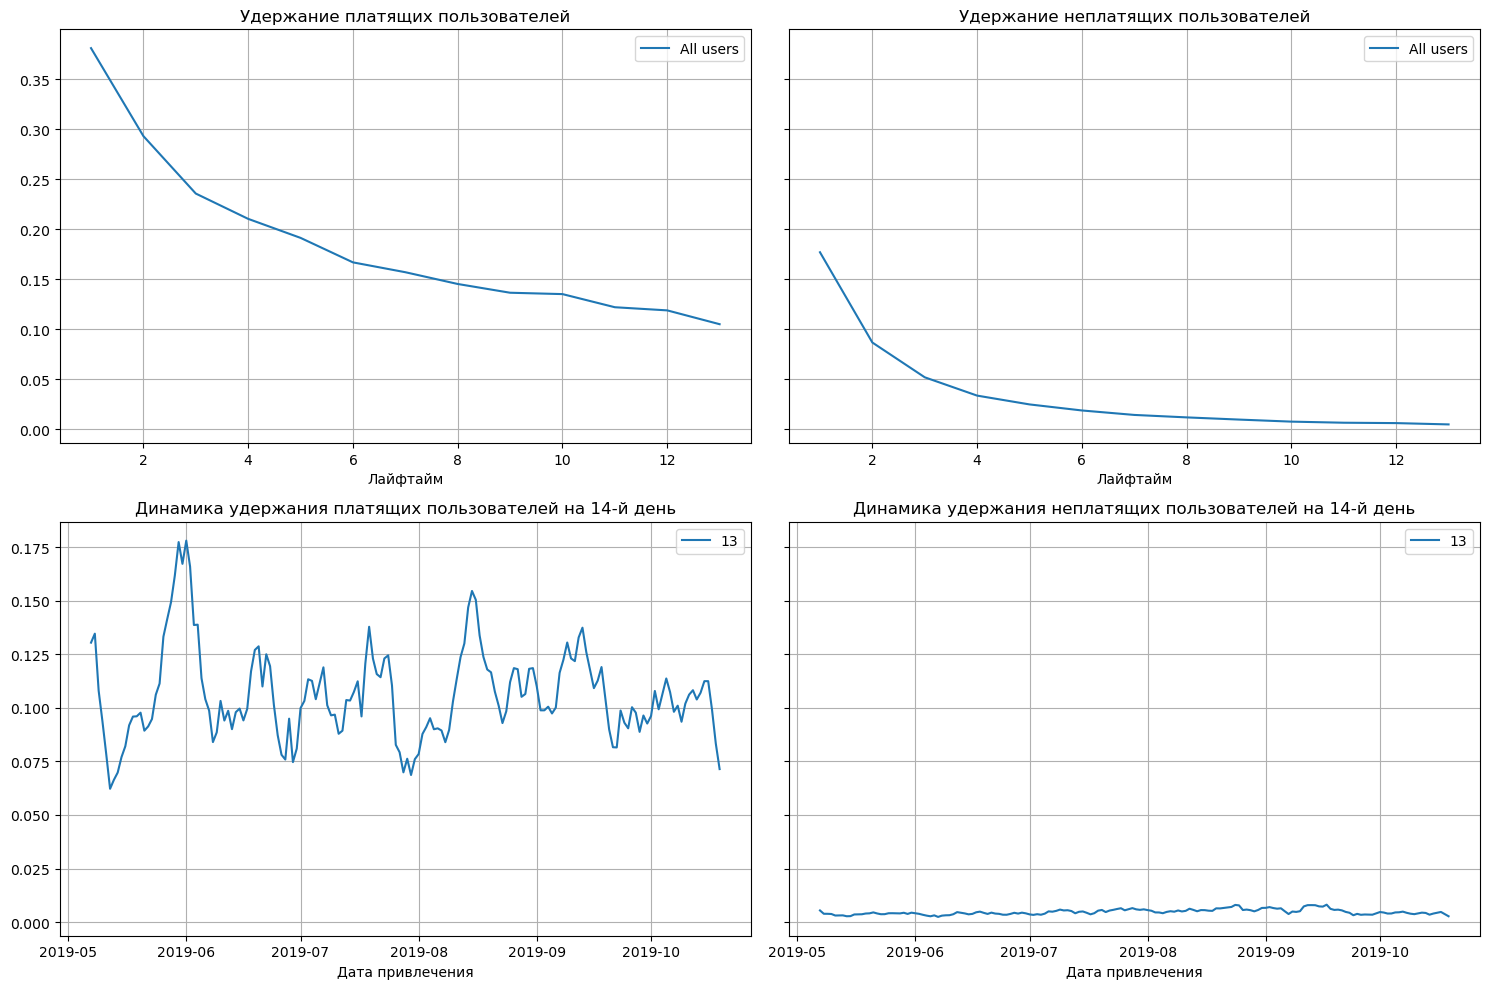

In [51]:
# Построим графики удержания
plot_retention(retention, retention_history, horizon_days)

**Вывод:** 

Судя по графикам пользователи конвертируются хорошо. Конверсия постепенно растет на протяжении всех двух недель. Примерно 6% новых пользователей совершают покупки в день первого посещения, а к четырнадцатому дню «жизни» доля покупателей достигает 8%.

Удержание платящих пользователей выше неплатящих, оно постпенно снижается. К последнему дню «жизни» доля платящих пользователей достигает примерно 10%, у неплатящих стремится к нулю.

### Анализ окупаемости рекламы с разбивкой по устройствам

<a id="15-bullet"></a>

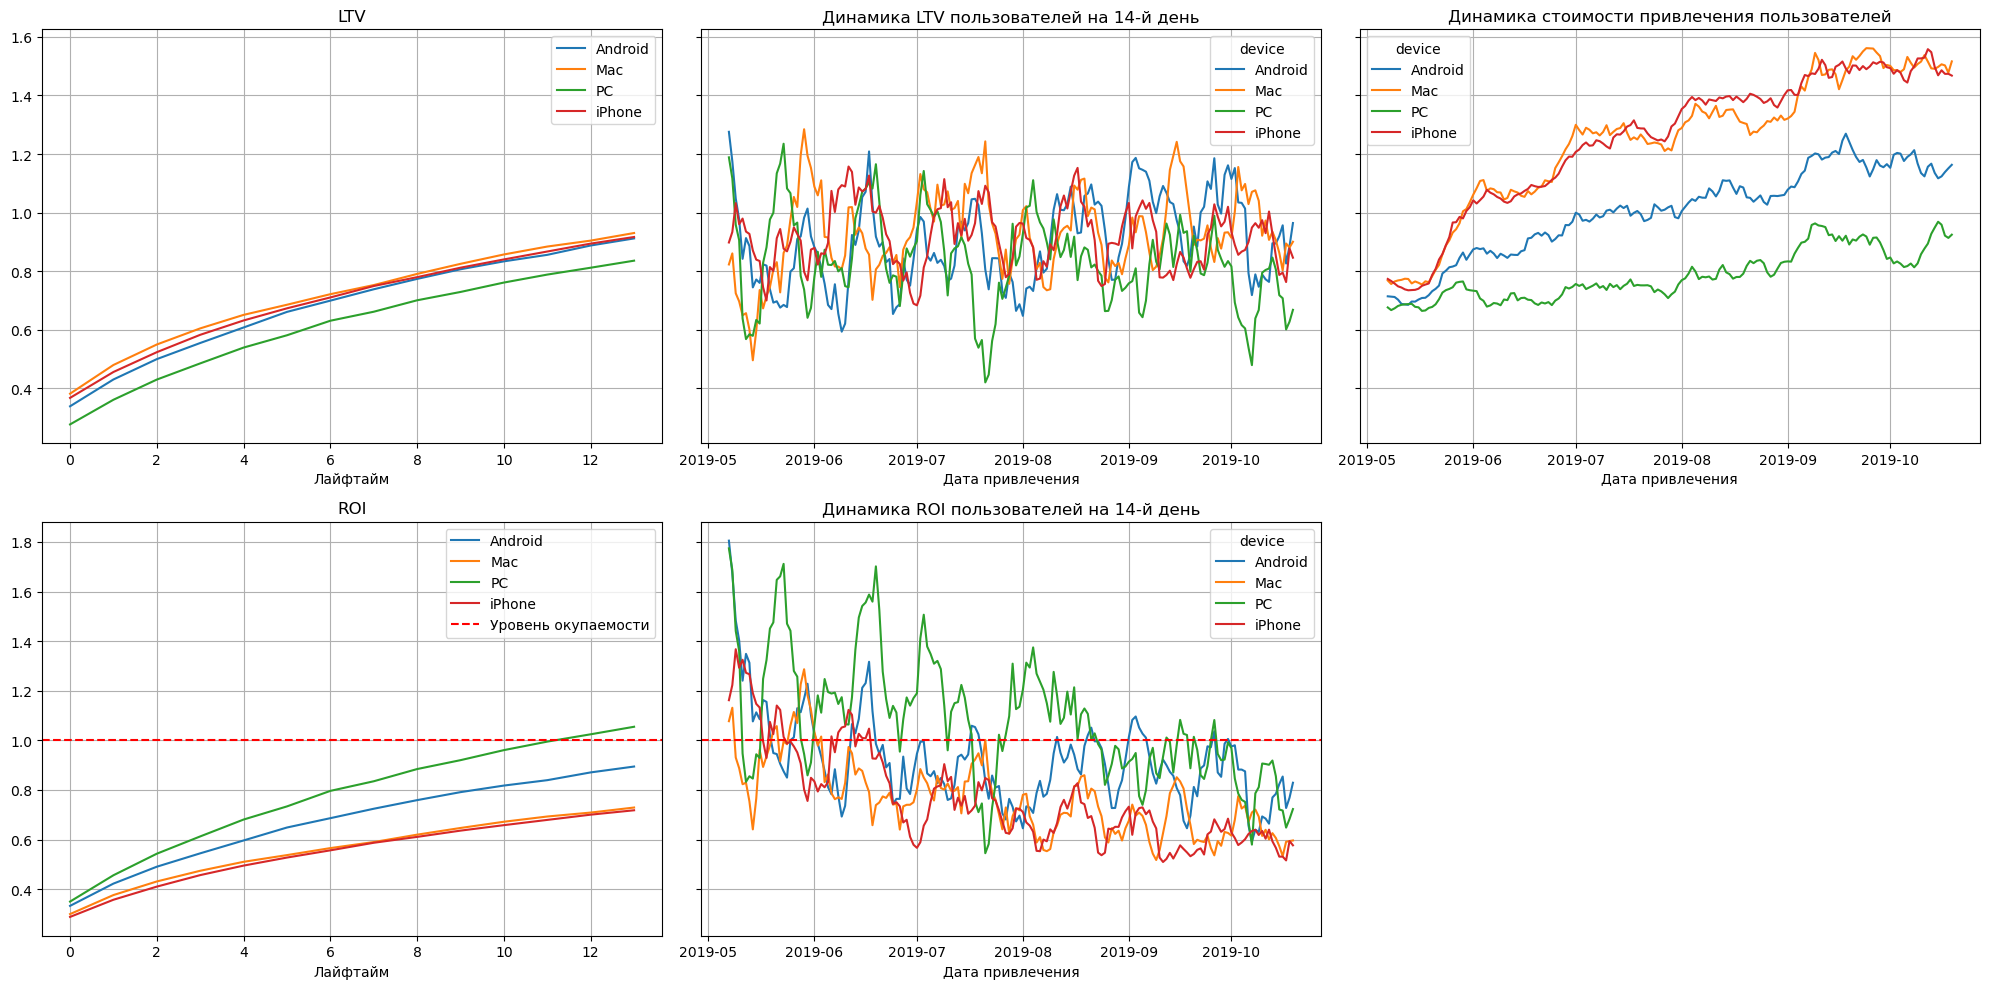

In [52]:
#Зададим разбивку по устройствам
dimensions = ['device']
# считаем LTV и ROI с помощью функции get_ltv()
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# строим графики с помощью функции plot_ltv_roi()
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод:** 

Реклама окупается только для PC. ROI Android стремится к 0.9. Показатели ROI для iPhone и Mac примерно одинаковы.
Стоимость привлечения пользователей нестабильна и различается. Максимальные показатели у iPhone и Mac, самая низкая стоимость у PC.
LTV всё так же подвержен сезонности, но стабилен.

### Анализ окупаемости рекламы с разбивкой по странам

<a id="16-bullet"></a>

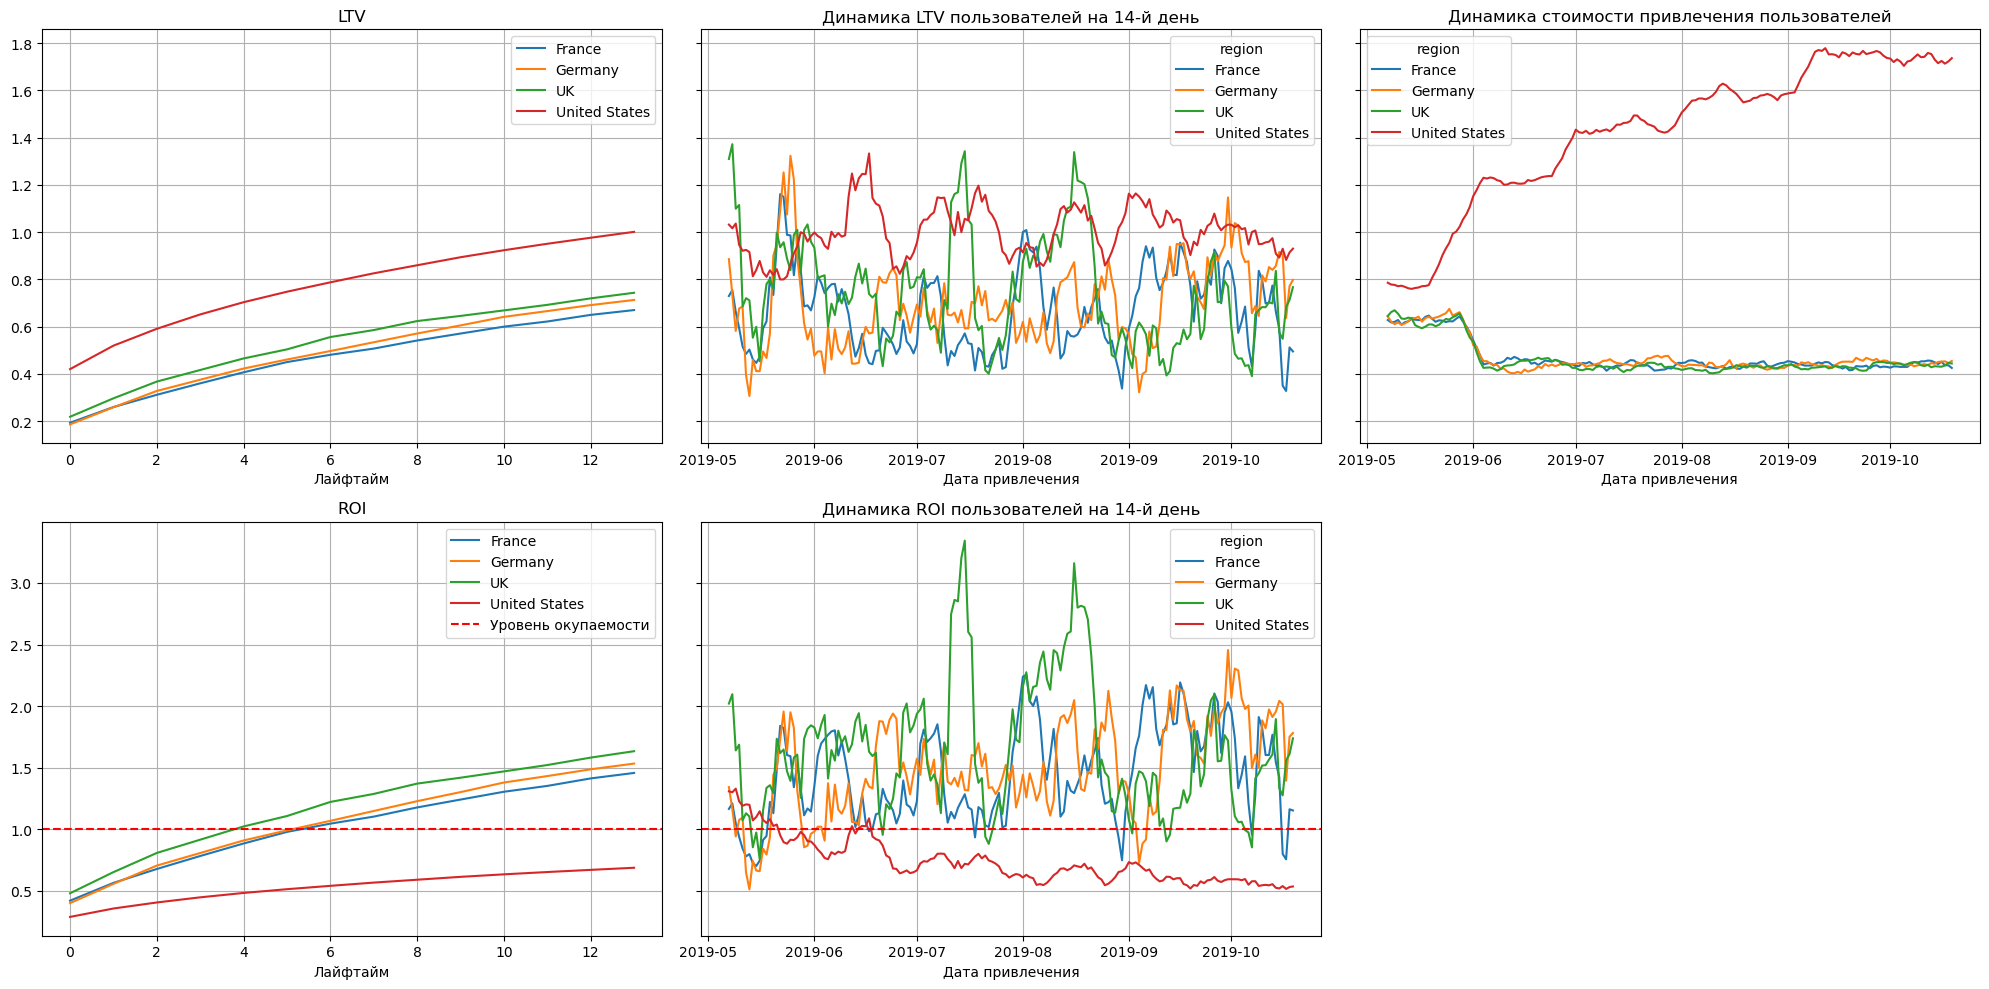

In [53]:
dimensions = ['region']
# считаем LTV и ROI с помощью функции get_ltv()
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# строим графики с помощью функции plot_ltv_roi()
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод:** 

Реклама окупается для всех стран, кроме Соединенных Штатов. Выделяется «пожизненная ценность» клиента в Соединенных Штатах.
По графику динамики стоимости привлечения пользователей можно заметить изменения после июня 2019. Вложения в рекламу в Соединенных Штатах каждый месяц растут, и наоборот траты в остальных странах снизились и в последствии остаются более стабильными. К концу октября 2019 года стоимость привлечения пользователей в США выросла более чем в 3 раза.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам

<a id="17-bullet"></a>

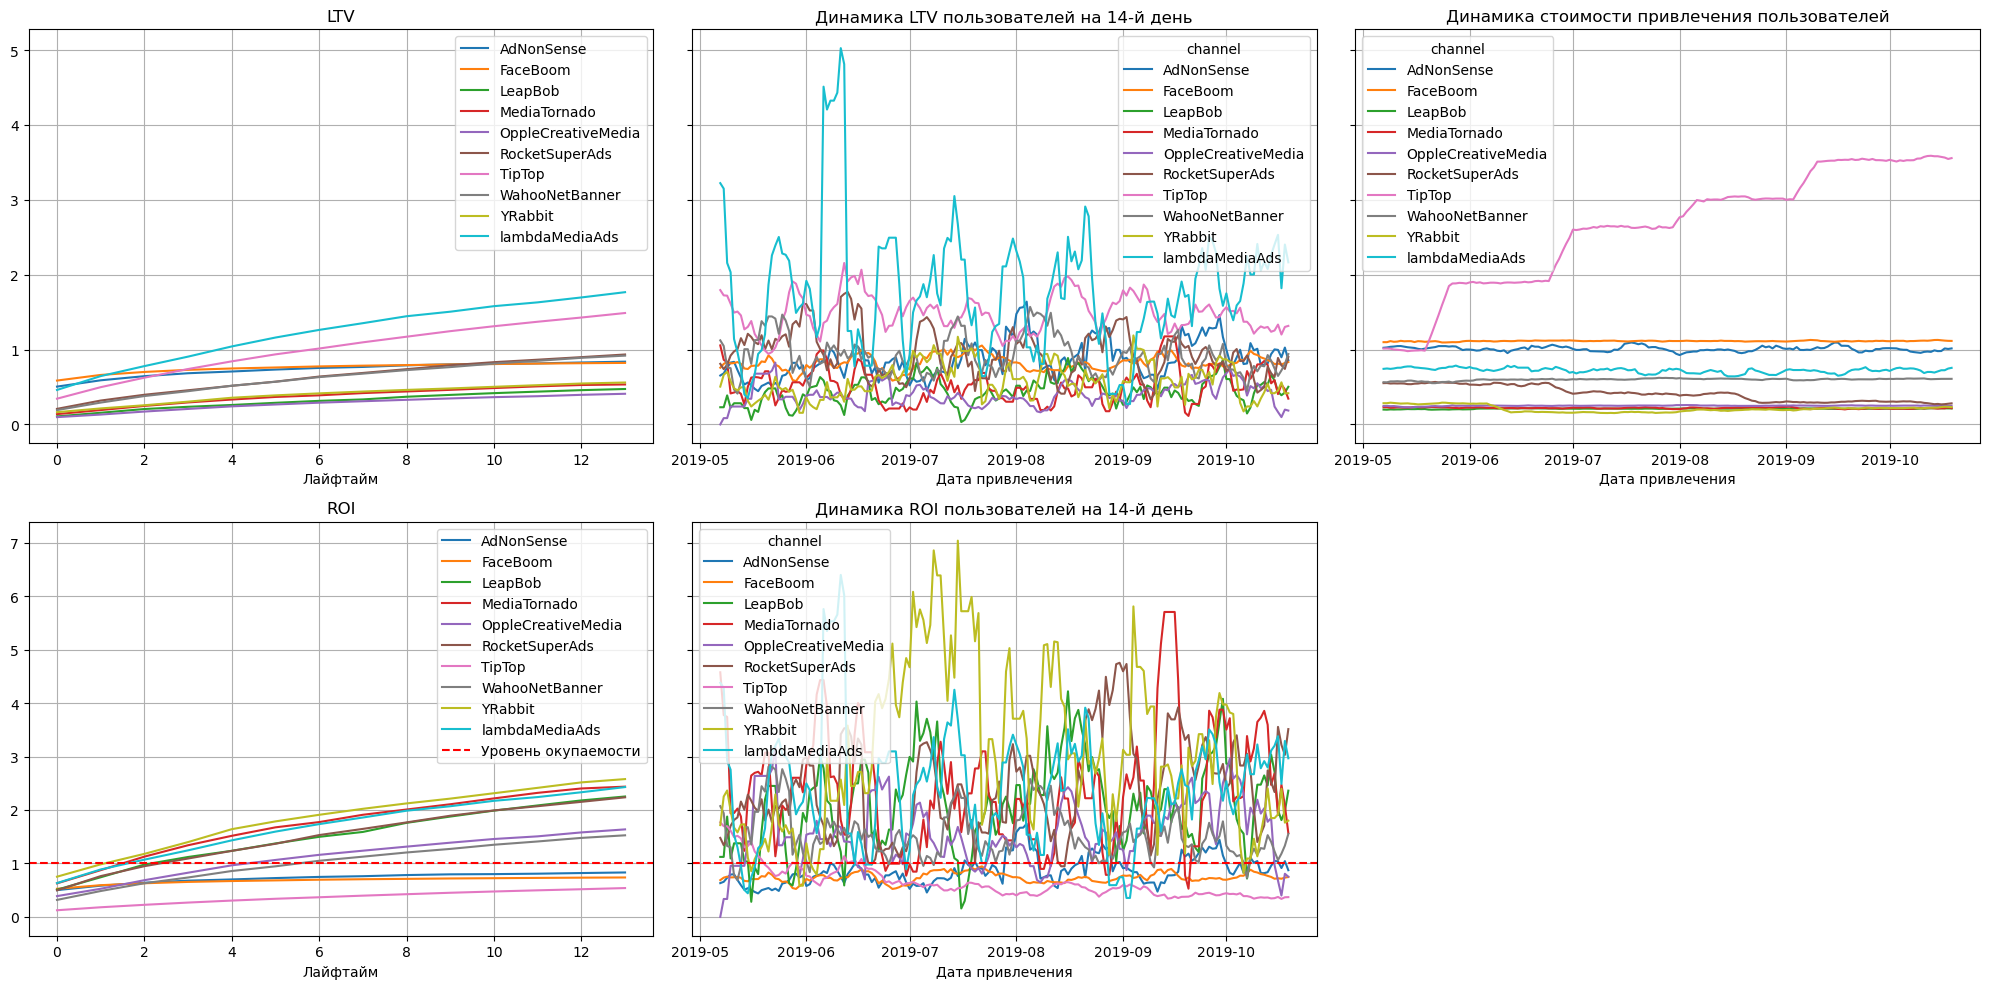

In [54]:
dimensions = ['channel']
# считаем LTV и ROI с помощью функции get_ltv()
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# строим графики с помощью функции plot_ltv_roi()
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод:** 

Реклама окупается для всех рекламных каналов, кроме AdNonSense, FaceBoom, TipTop, у послдених самых худший показатель ROI. Наилушие значения у YRabbit, MediaTornado и lambdaMediaAds. Выделяется «пожизненная ценность» клиента в таких рекламных источниках, как lambdaMediaAds и TipTop.
Стоимость привлечения пользователей относительно стабильна, кроме канала TipTop. Для котрого каждый месяц ярко выделяется повышение стоимости привлечения пользователей.

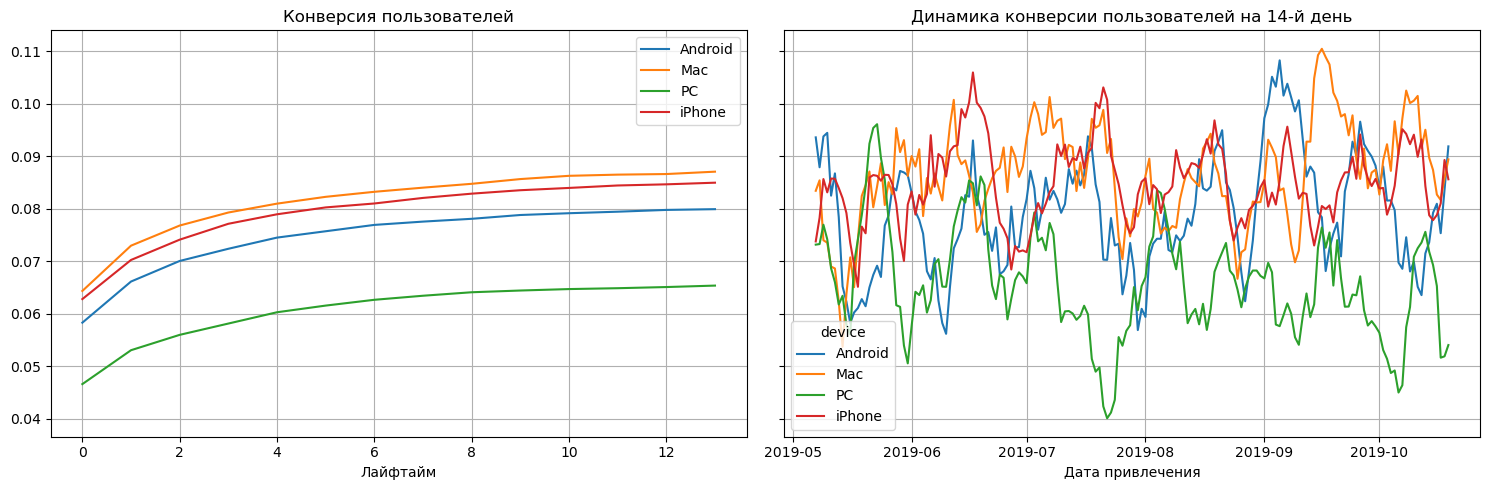

In [55]:
# смотрим конверсию с разбивкой по устройствам с помощью функции get_conversion()

dimensions = ['device']

conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# Построим графики конверсии
plot_conversion(conversion, conversion_history, horizon_days)

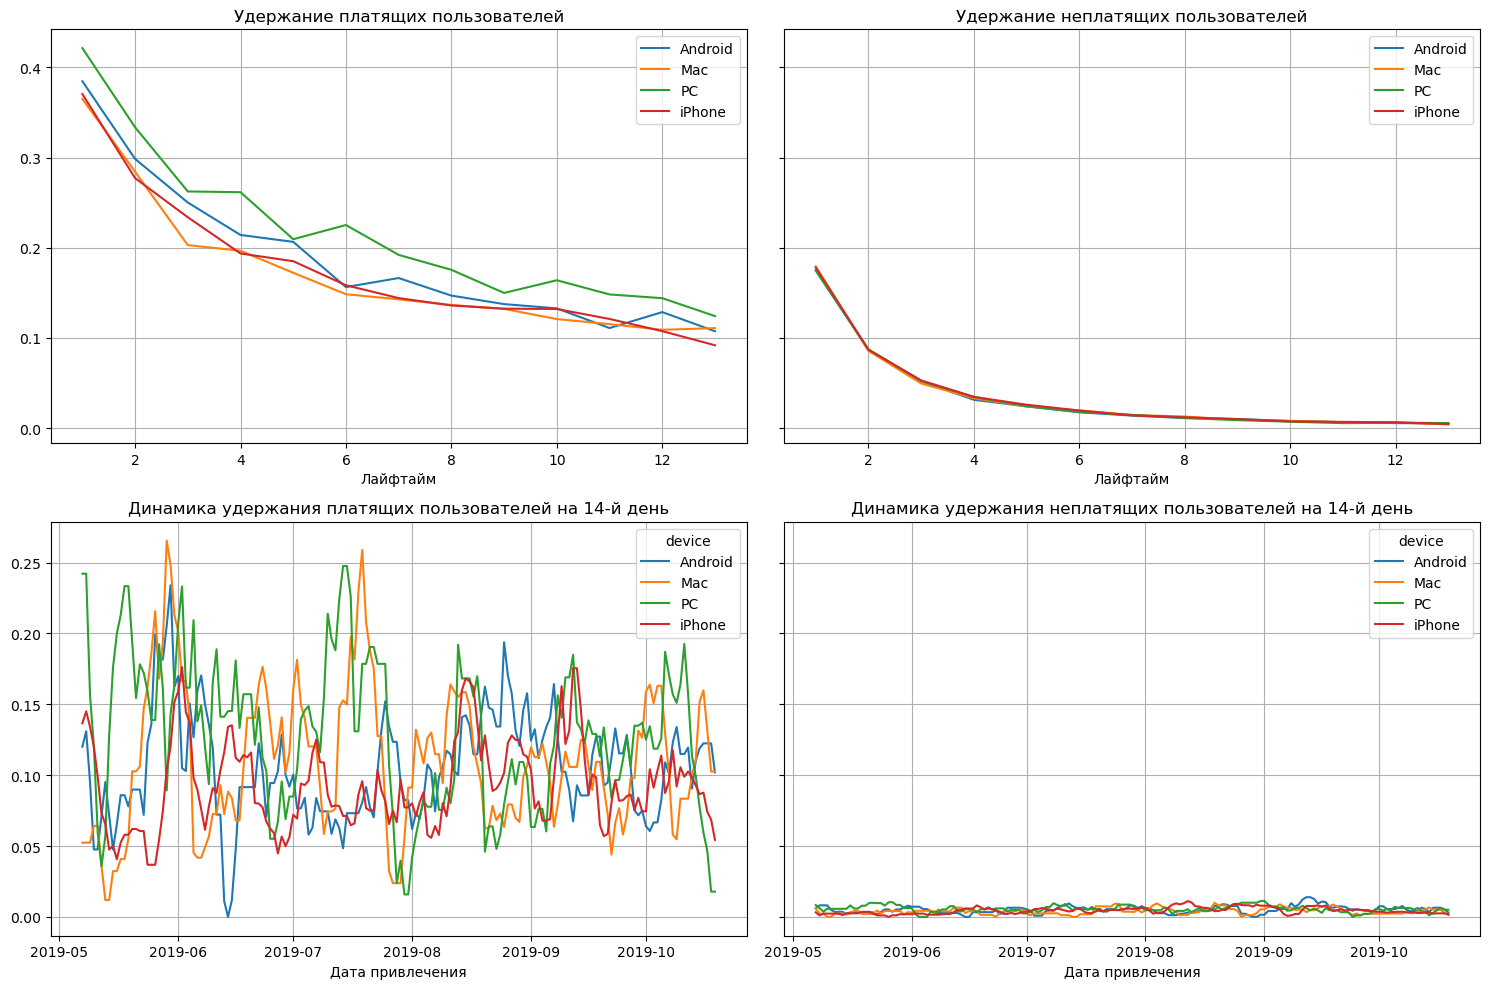

In [56]:
# найдем удержание с помощью функции get_retention()
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

# Построим графики удержания
plot_retention(retention, retention_history, horizon_days)

**Вывод:**

По графикам конверсии видно, что пользователи Mac и iPhone конвертируются хорошо, причём постоянно, показатель конверсии стремится к 9%. Худшая конверсия у пользователей PC, она не превышает 7%. И совсем наоборот дело обстоит с удержанием пользователей, хотя сильных различий нет. Лучшие показатели у PC, худшие у пользователей Mac и iPhone. Для всех устройств характерно снижение удержания сразу после первого дня жизни (примерно 0.4) и затем плавное уменьшение, на 14 день удержание составляет примерно 0.1.

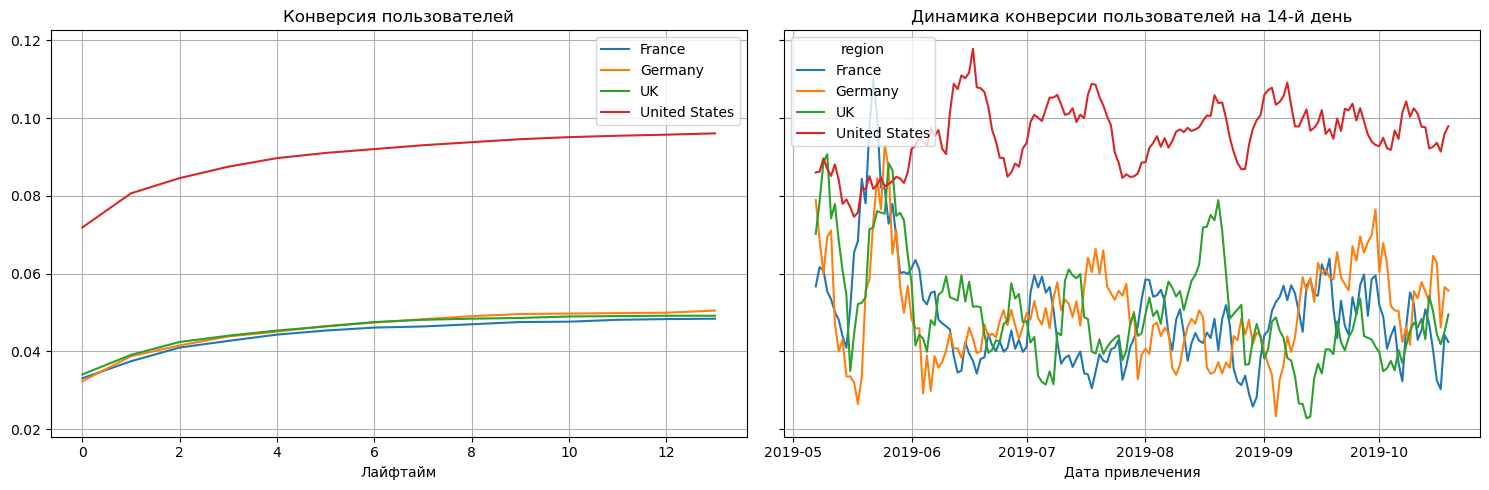

In [57]:
# смотрим конверсию с разбивкой по странам с помощью функции get_conversion()

dimensions = ['region']

conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# Построим графики конверсии
plot_conversion(conversion, conversion_history, horizon_days)

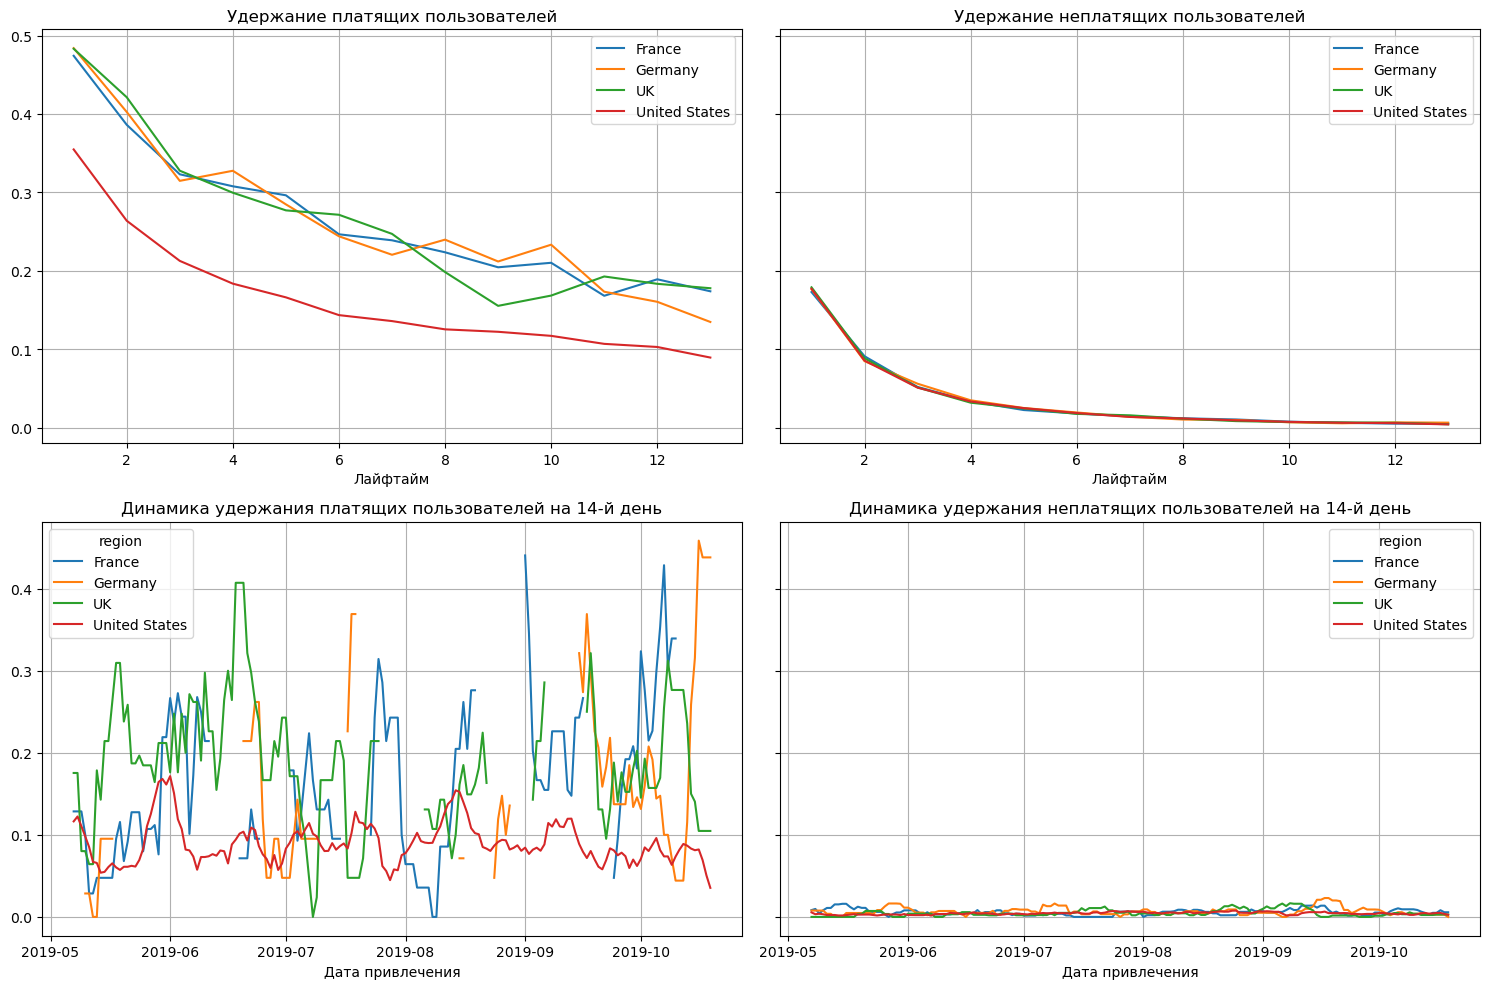

In [58]:
# найдем удержание с помощью функции get_retention()
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

# Построим графики удержания
plot_retention(retention, retention_history, horizon_days)

**Вывод:**


По графикам конверсии видно, что пользователи из США конвертируются очень хорошо, причём постоянно, в отличие от остальных стран, у которых показатели почти в 2 раза ниже. К концу второй недели конверсия у США стремится к 10%, а у остальных - примерно 5%.

С удержанием такая тенденция, как и в анализе устройств. Хуже всего удерживаеются пользователи из США, остальные страны показывают примерно одинаковый уровень. 

Для США: На первый день жизни - примерно 0.35, на четырнадцатый - ниже 0.1

Для остальных стран: На первый день жизни - примерно 0.5, на четырнадцатый - примерно 0.15

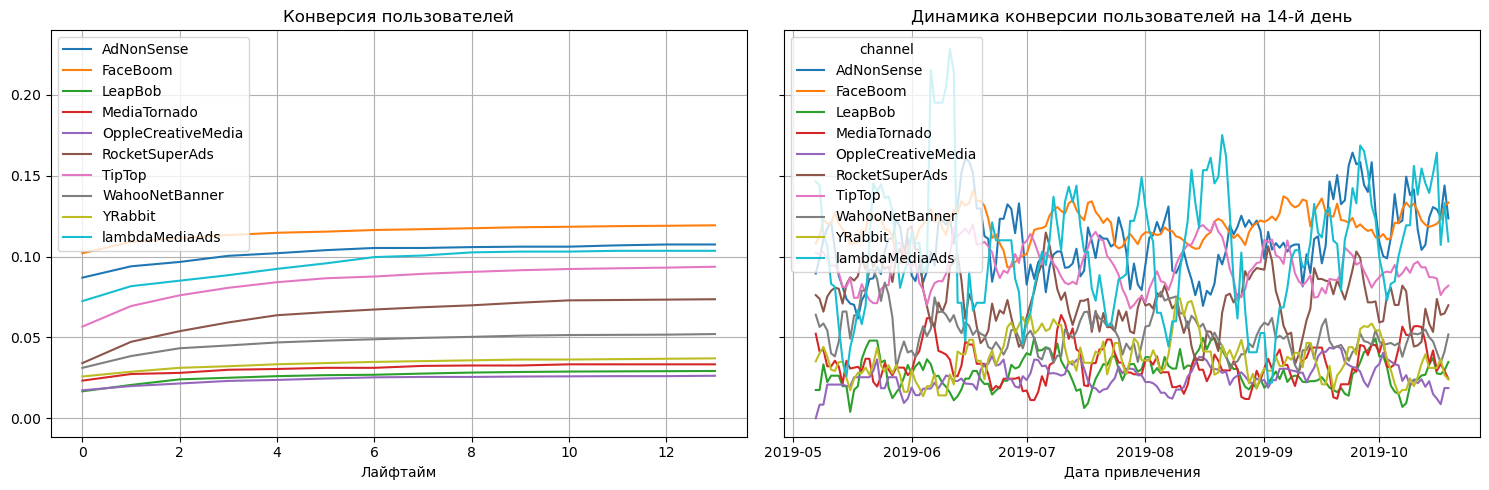

In [59]:
# смотрим конверсию с разбивкой по каналам с помощью функции get_conversion()

dimensions = ['channel']

conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# Построим графики конверсии
plot_conversion(conversion, conversion_history, horizon_days)

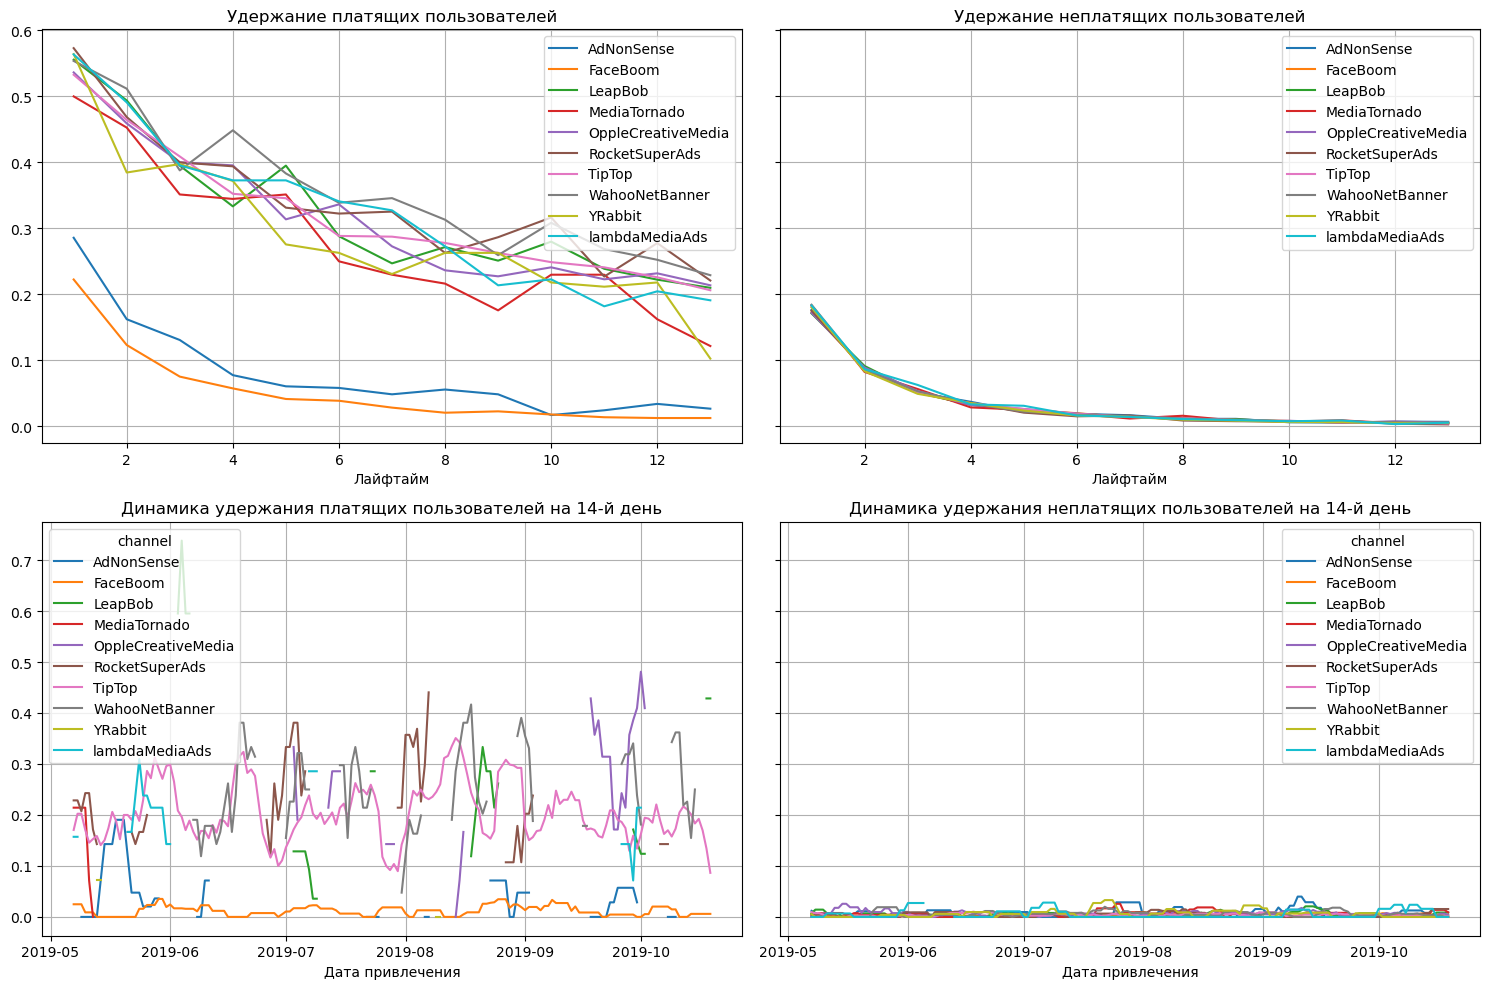

In [60]:
# найдем удержание с помощью функции get_retention()
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

# Построим графики удержания
plot_retention(retention, retention_history, horizon_days)

**Вывод:**

По графикам конверсии видно, что лучше всего конвертируются пользователи из рекламного источника FaceBoom ,также хорошие показатели у каналов AdNonSense, lambdaMediaAds и TipTop. К концу второй недели конверсия примерно 10%.

По графикам удержания ярко выделяется плохое удержание у каналов FaceBoom и AdNonSense, остальные рекламные источники показывают примерно одинаковый уровень. 

Для FaceBoom и AdNonSense: На первый день жизни - примерно 0.25, на четырнадцатый - стремится к 0

Для остальных: На первый день жизни - примерно 0.55, на четырнадцатый - примерно 0.2

**Рассмотрим отдельно все показатели для разных стран и устройств, чтобы выявить предпочтительные рекламные каналы**

Сначала проведем анализ для США, отфильтруем датафрейм с данными только по этой стране и построим нужные графики

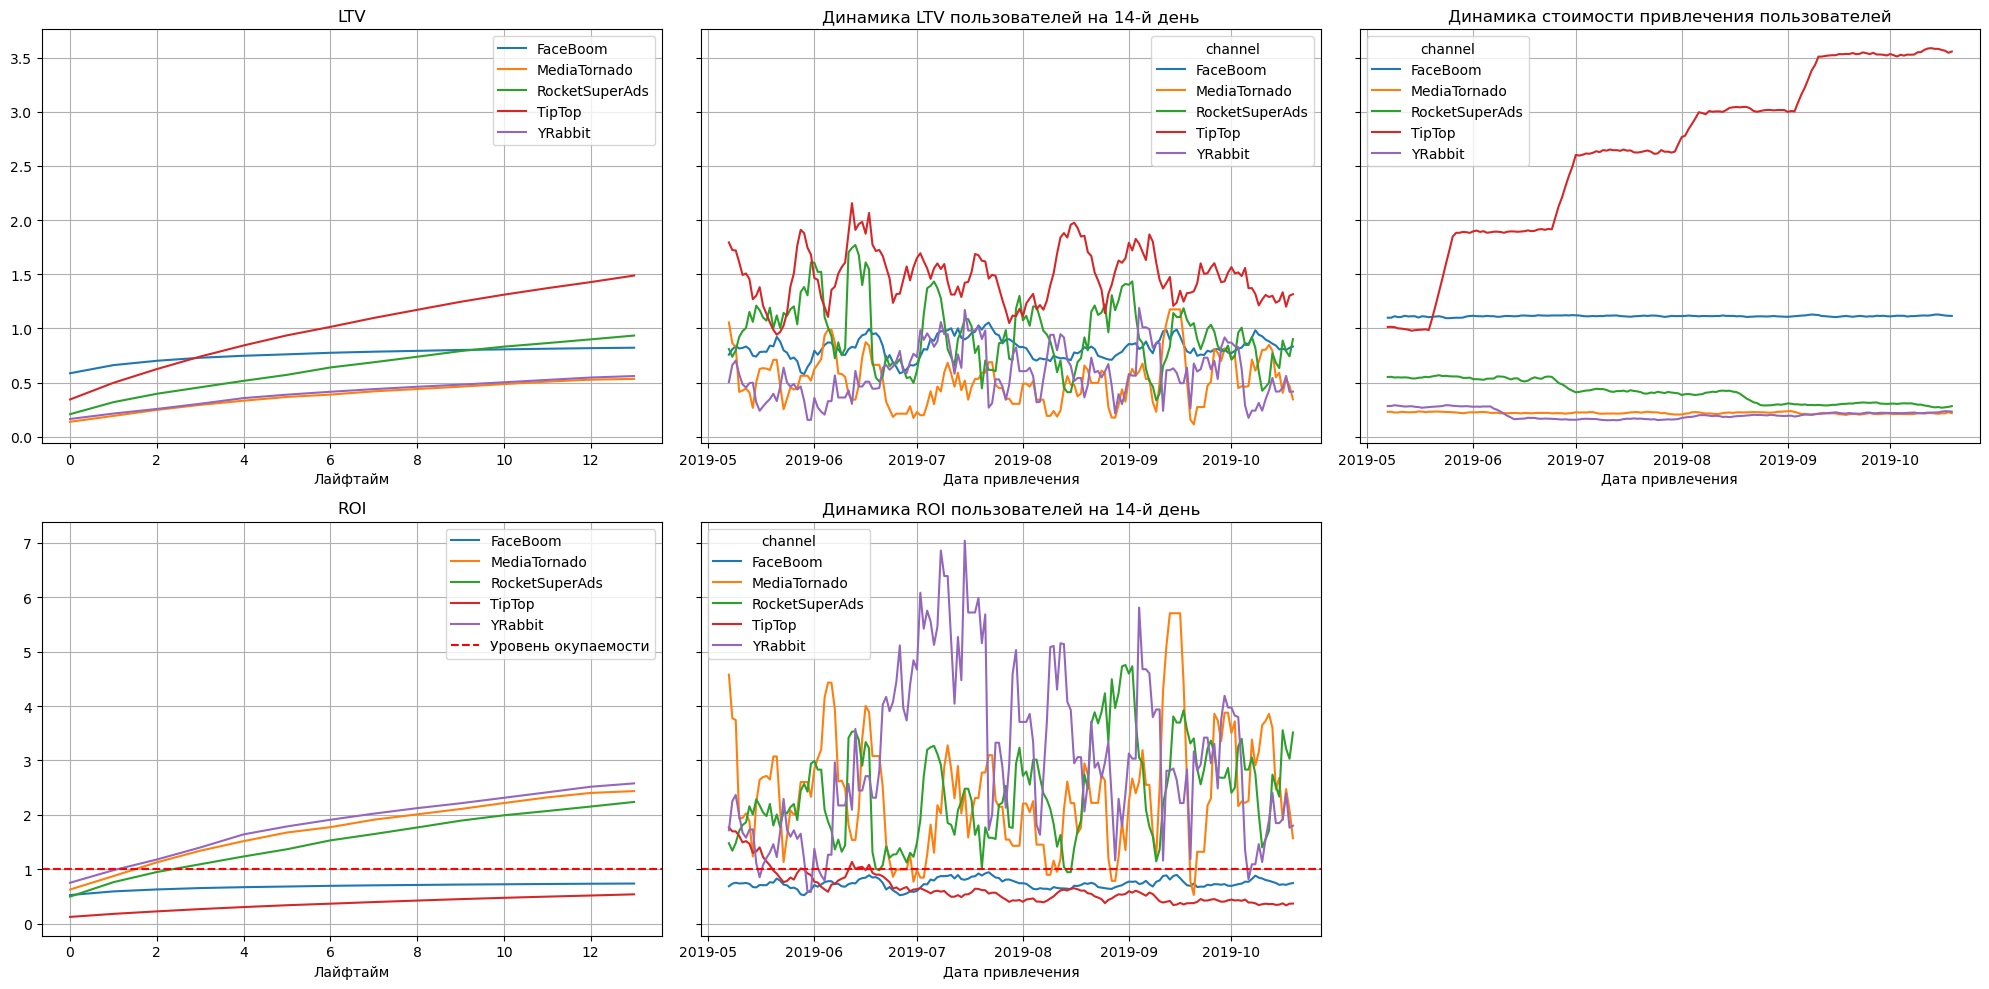

In [61]:
dimensions = ['channel']
profiles_us = profiles.query('region == "United States"')

# считаем LTV и ROI с помощью функции get_ltv()
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_us, orders, observation_date, horizon_days, dimensions=dimensions
)
# строим графики с помощью функции plot_ltv_roi()
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

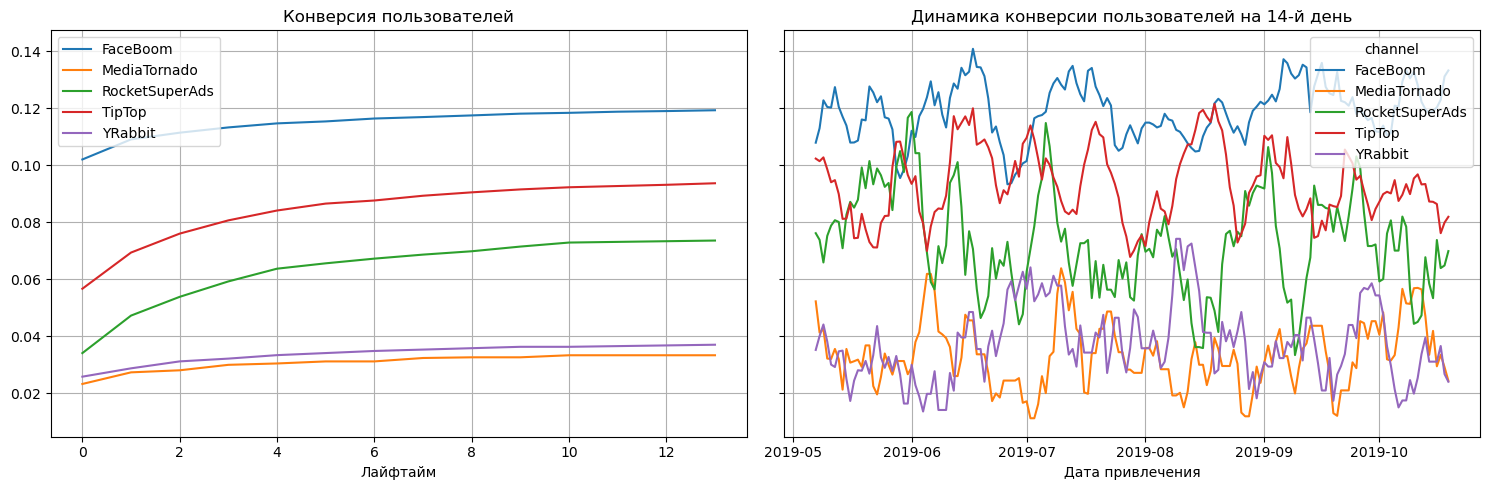

In [62]:
# смотрим конверсию с разбивкой по каналам с помощью функции get_conversion()

dimensions = ['channel']

conversion_raw, conversion, conversion_history = get_conversion(
    profiles_us, orders, observation_date, horizon_days, dimensions=dimensions)

# Построим графики конверсии
plot_conversion(conversion, conversion_history, horizon_days)

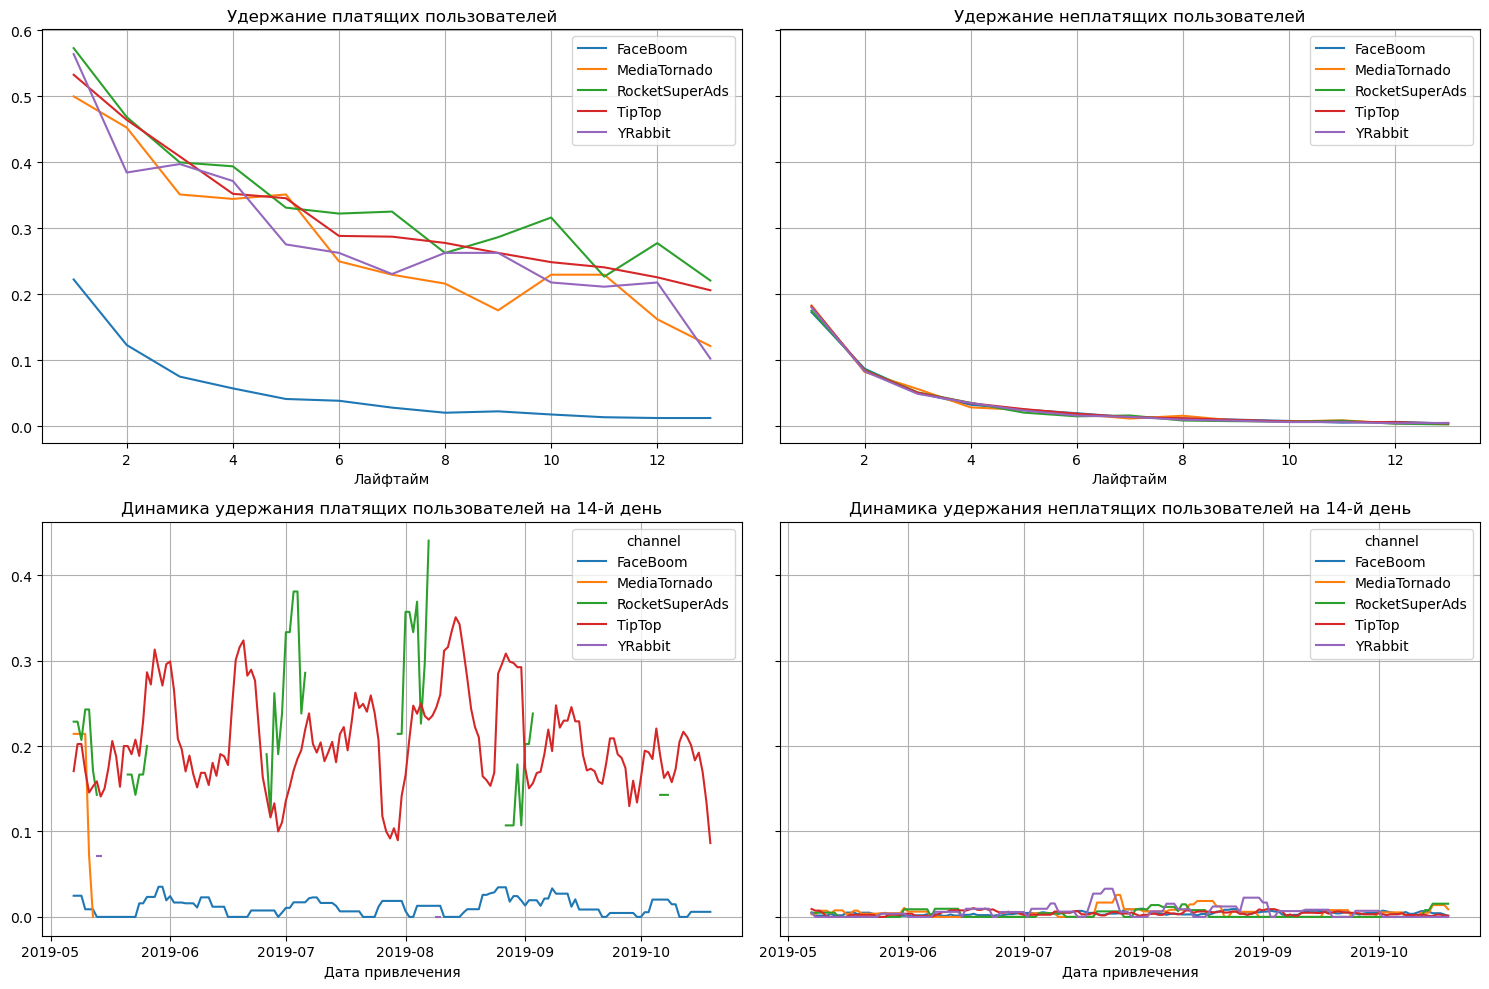

In [63]:
dimensions = ['channel']
# найдем удержание с помощью функции get_retention()
retention_raw, retention, retention_history = get_retention(
    profiles_us, visits, observation_date, horizon_days, dimensions=dimensions
)

# Построим графики удержания
plot_retention(retention, retention_history, horizon_days)

**Вывод:**

Для США не окупаются рекламные каналы TipTop и FaceBoom, хоршие показатели у YRabbit, MediaTornado, RocketSuperAds.
Лучшая конверсия у FaceBoom, TipTop и RocketSuperAds. Самое худшее удердание у FaceBoom, остальные примерно. одинаковые.

Теперь проведем анализ для европейских стран, отфильтруем датафрейм с данными только по этим странам и построим нужные графики

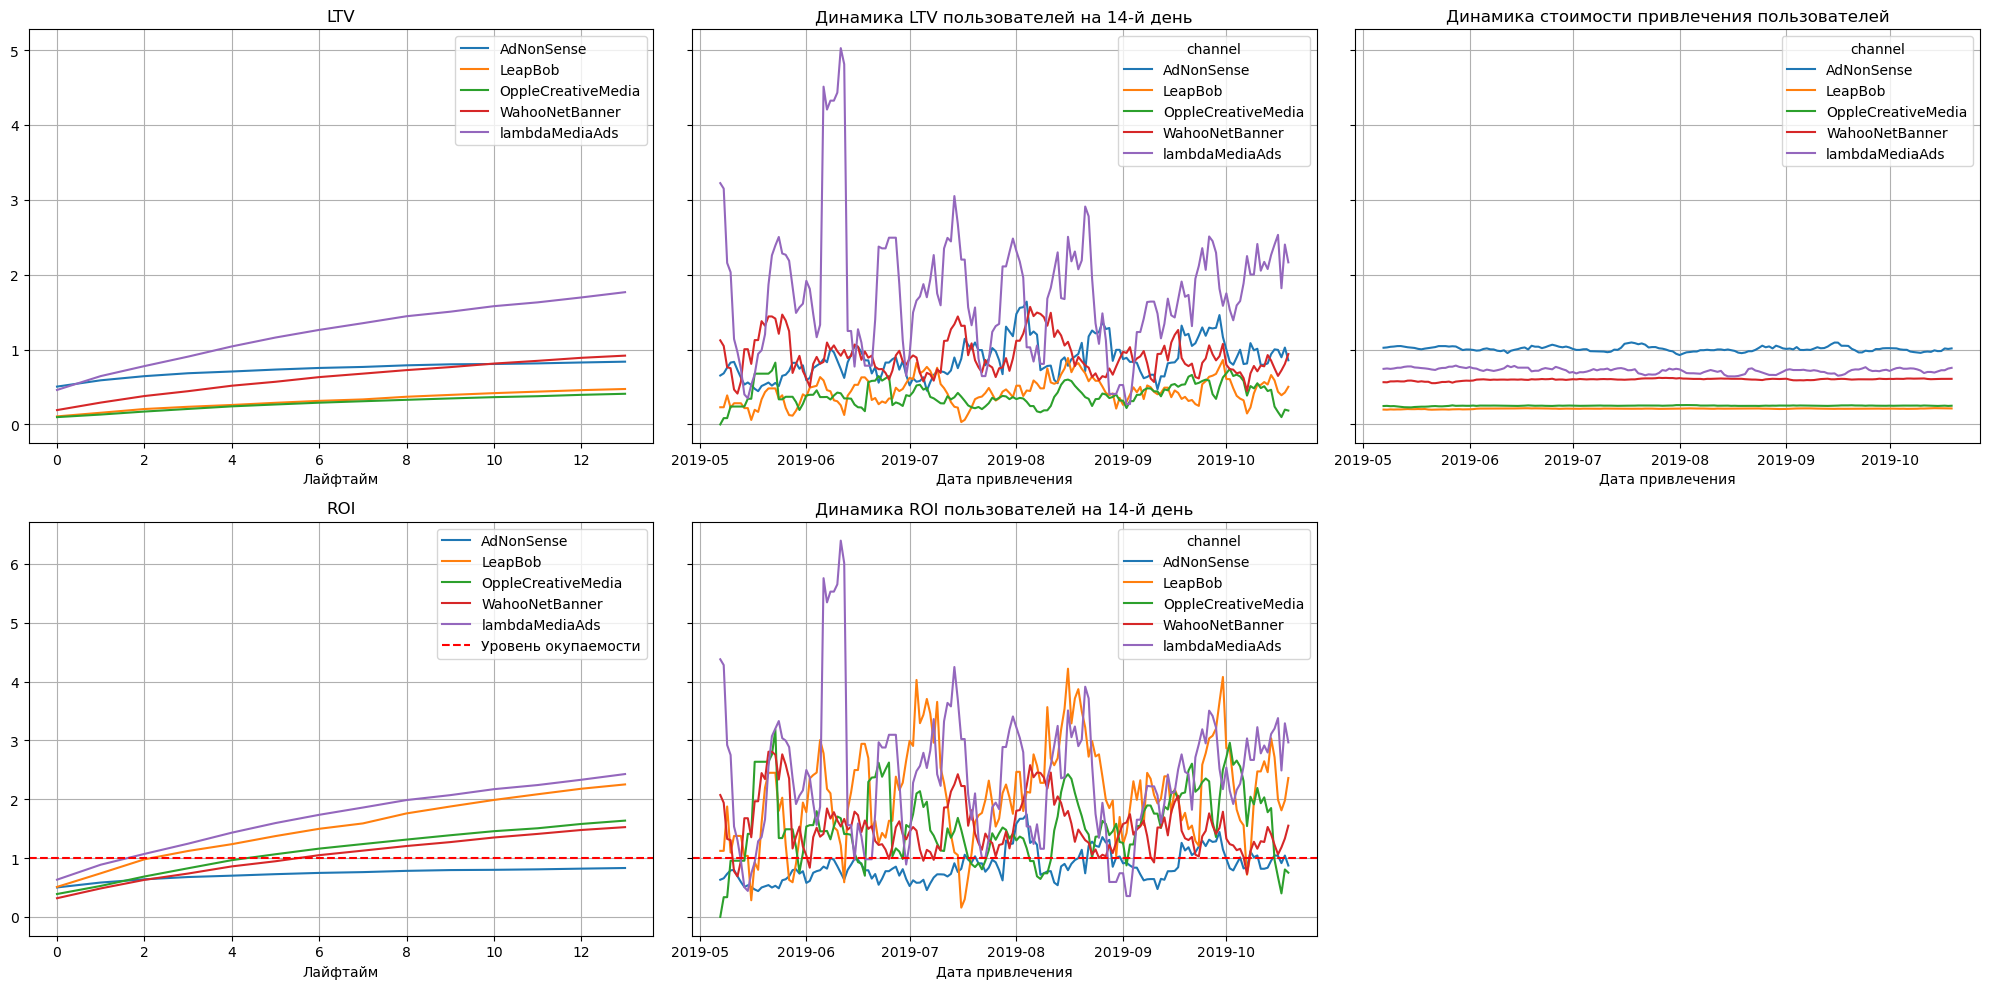

In [64]:
dimensions = ['channel']
profiles_evr = profiles.query('region != "United States"')

# считаем LTV и ROI с помощью функции get_ltv()
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_evr, orders, observation_date, horizon_days, dimensions=dimensions
)
# строим графики с помощью функции plot_ltv_roi()
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

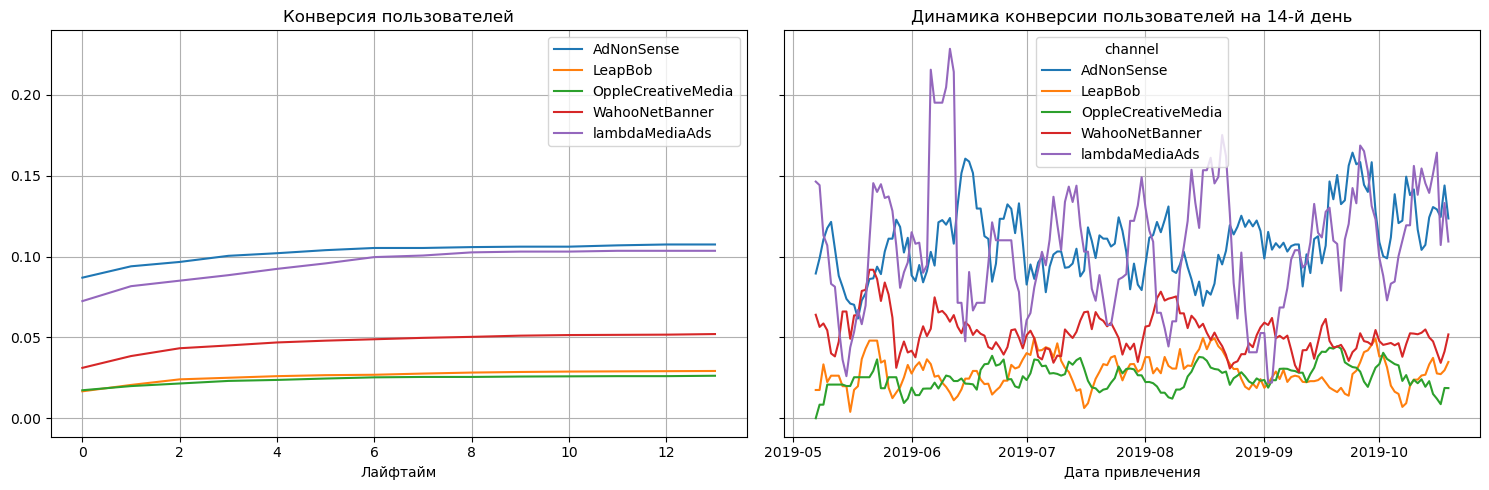

In [65]:
# смотрим конверсию с разбивкой по каналам с помощью функции get_conversion()

dimensions = ['channel']

conversion_raw, conversion, conversion_history = get_conversion(
    profiles_evr, orders, observation_date, horizon_days, dimensions=dimensions)

# Построим графики конверсии
plot_conversion(conversion, conversion_history, horizon_days)

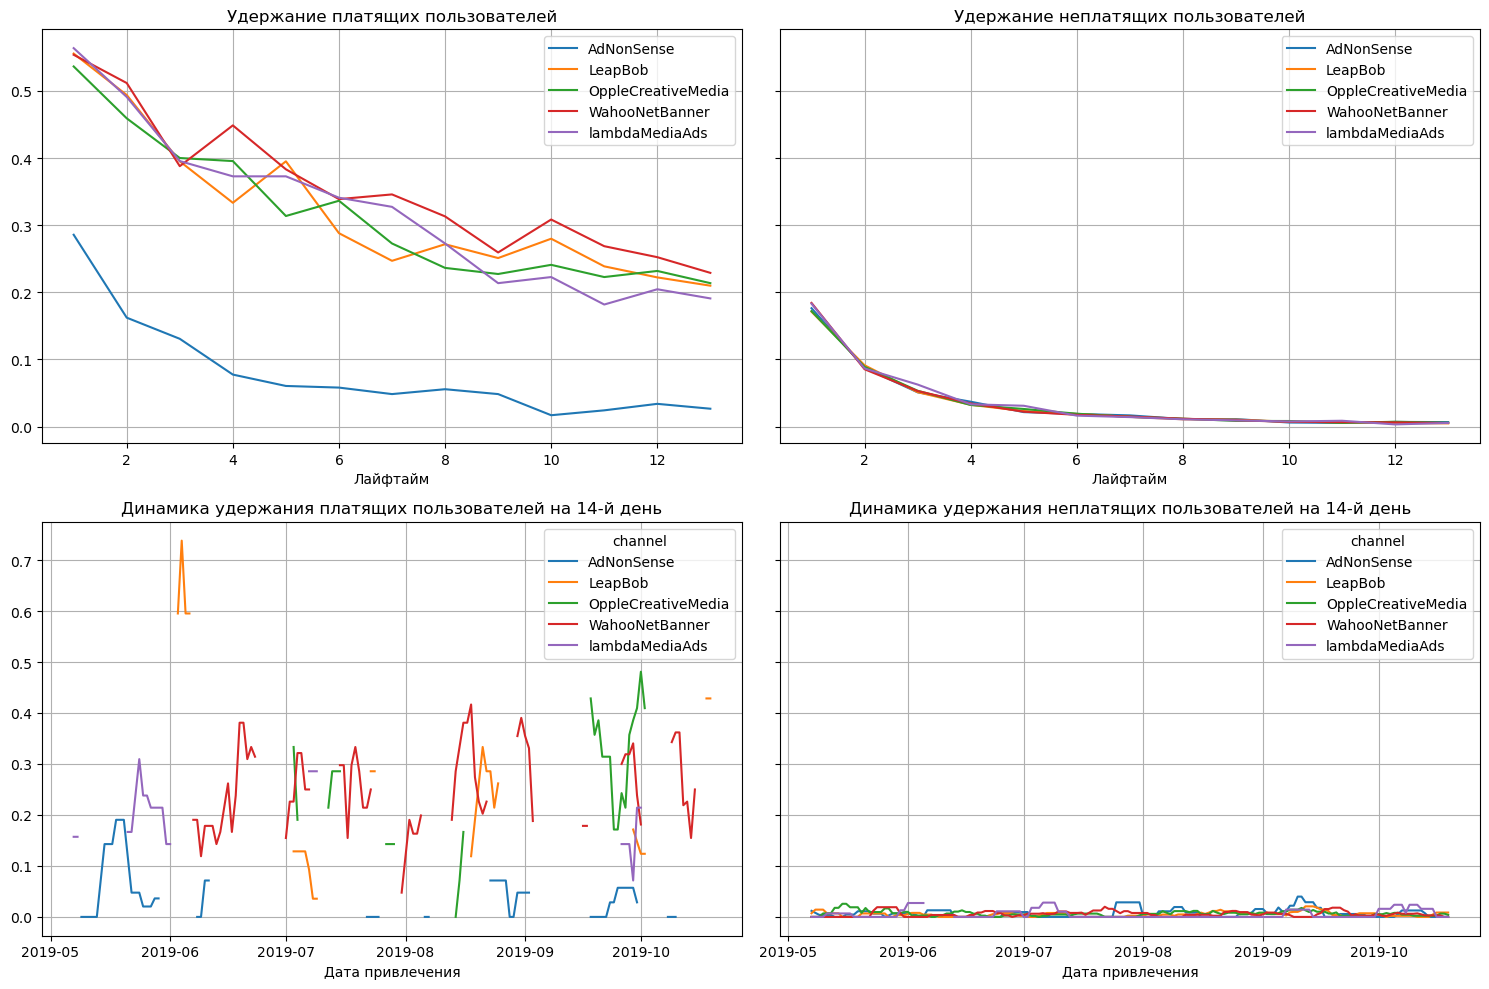

In [66]:
dimensions = ['channel']
# найдем удержание с помощью функции get_retention()
retention_raw, retention, retention_history = get_retention(
    profiles_evr, visits, observation_date, horizon_days, dimensions=dimensions
)

# Построим графики удержания
plot_retention(retention, retention_history, horizon_days)

**Вывод:**

Для Европы реклама не окупаются только для канала AdNonSense, хоршие показатели lambdaMediaAds, LeapBob.
Лучшая конверсия у AdNonSense и lambdaMediaAds. Самое худшее удержание у AdNonSense, остальные примерно одинаковые.

Теперь проведем анализ для устройств, начнем с пользователей 'iPhone' и 'Mac', отфильтруем датафрейм с данными только по этим устройствам и построим нужные графики

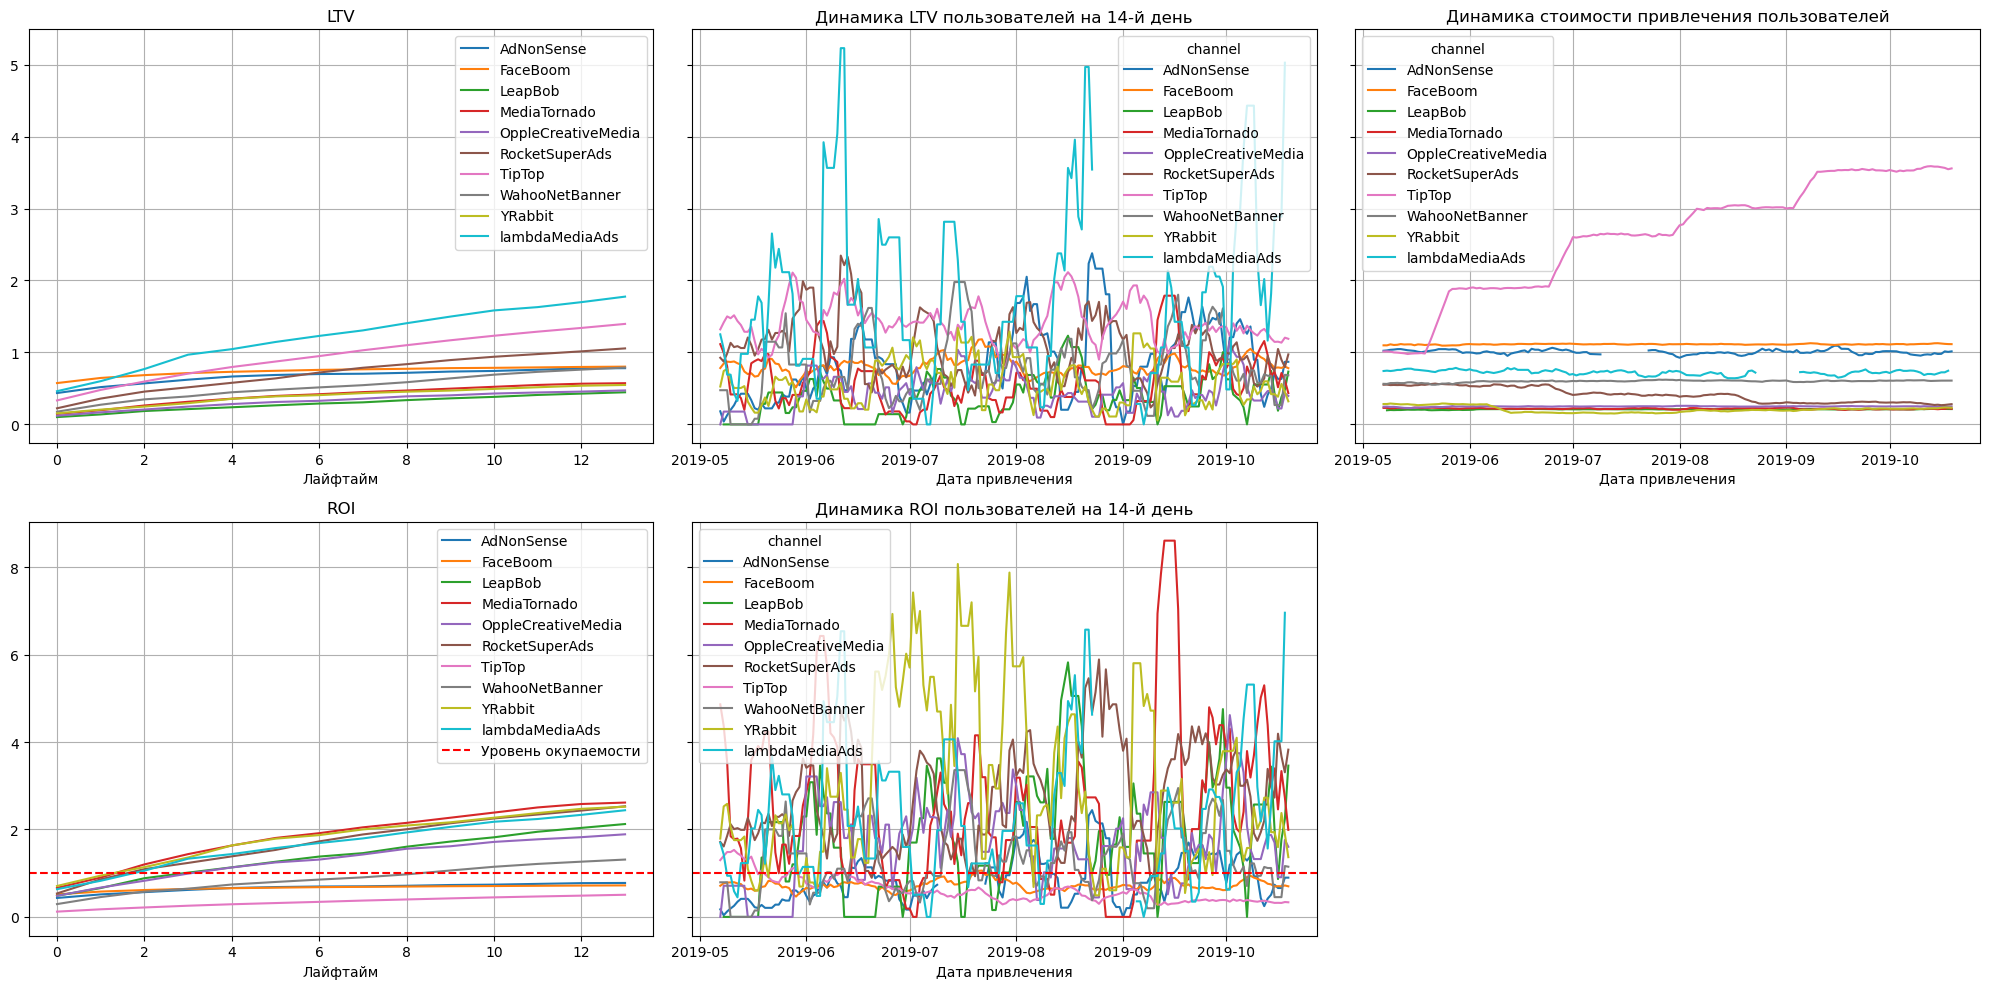

In [67]:
dimensions = ['channel']
device_list = ['iPhone','Mac']
profiles_d = profiles.query('device.isin(@device_list)')

# считаем LTV и ROI с помощью функции get_ltv()
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_d, orders, observation_date, horizon_days, dimensions=dimensions
)
# строим графики с помощью функции plot_ltv_roi()
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

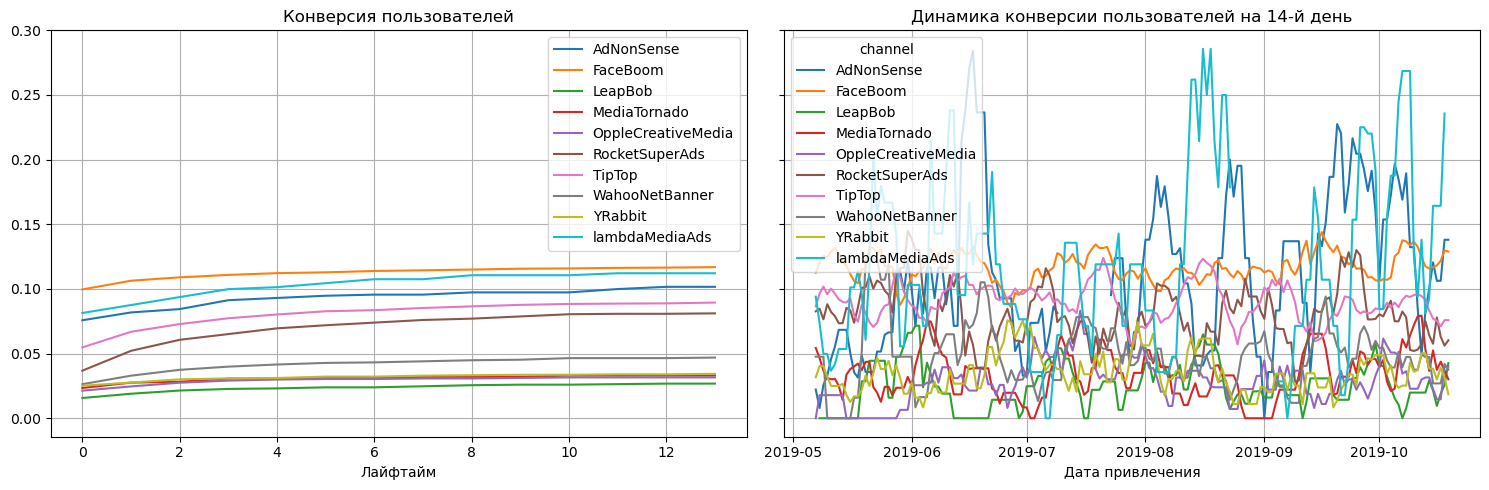

In [68]:
# смотрим конверсию с разбивкой по каналам с помощью функции get_conversion()

dimensions = ['channel']

conversion_raw, conversion, conversion_history = get_conversion(
    profiles_d, orders, observation_date, horizon_days, dimensions=dimensions)

# Построим графики конверсии
plot_conversion(conversion, conversion_history, horizon_days)

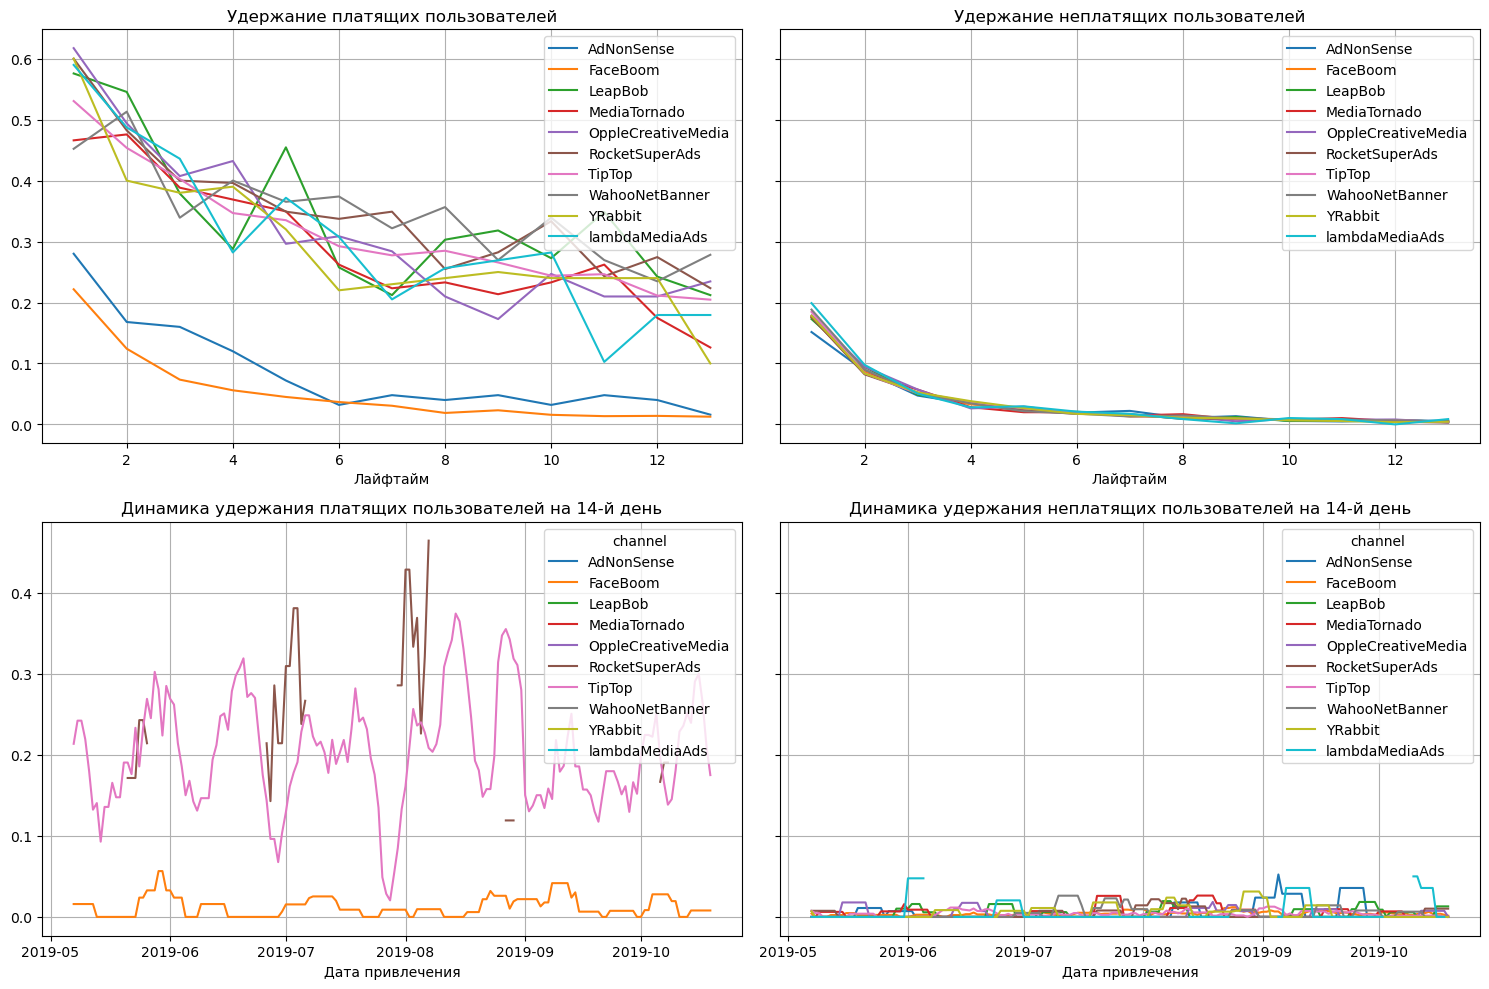

In [69]:
dimensions = ['channel']
# найдем удержание с помощью функции get_retention()
retention_raw, retention, retention_history = get_retention(
    profiles_d, visits, observation_date, horizon_days, dimensions=dimensions
)

# Построим графики удержания
plot_retention(retention, retention_history, horizon_days)

**Вывод:**

Для 'iPhone' и 'Mac' не окупаются рекламные каналы TipTop, FaceBoom и AdNonSense, хоршие показатели у YRabbit, MediaTornado, lambdaMediaAds. 
Лучшая конверсия у FaceBoom, lambdaMediaAds, AdNonSense и TipTop. Самое худшее удердание у FaceBoom и AdNonSense, остальные примерно одинаковые.

Проведем анализ для устройств 'Android' и 'PC', отфильтруем датафрейм с данными только по этим устройствам и построим нужные графики

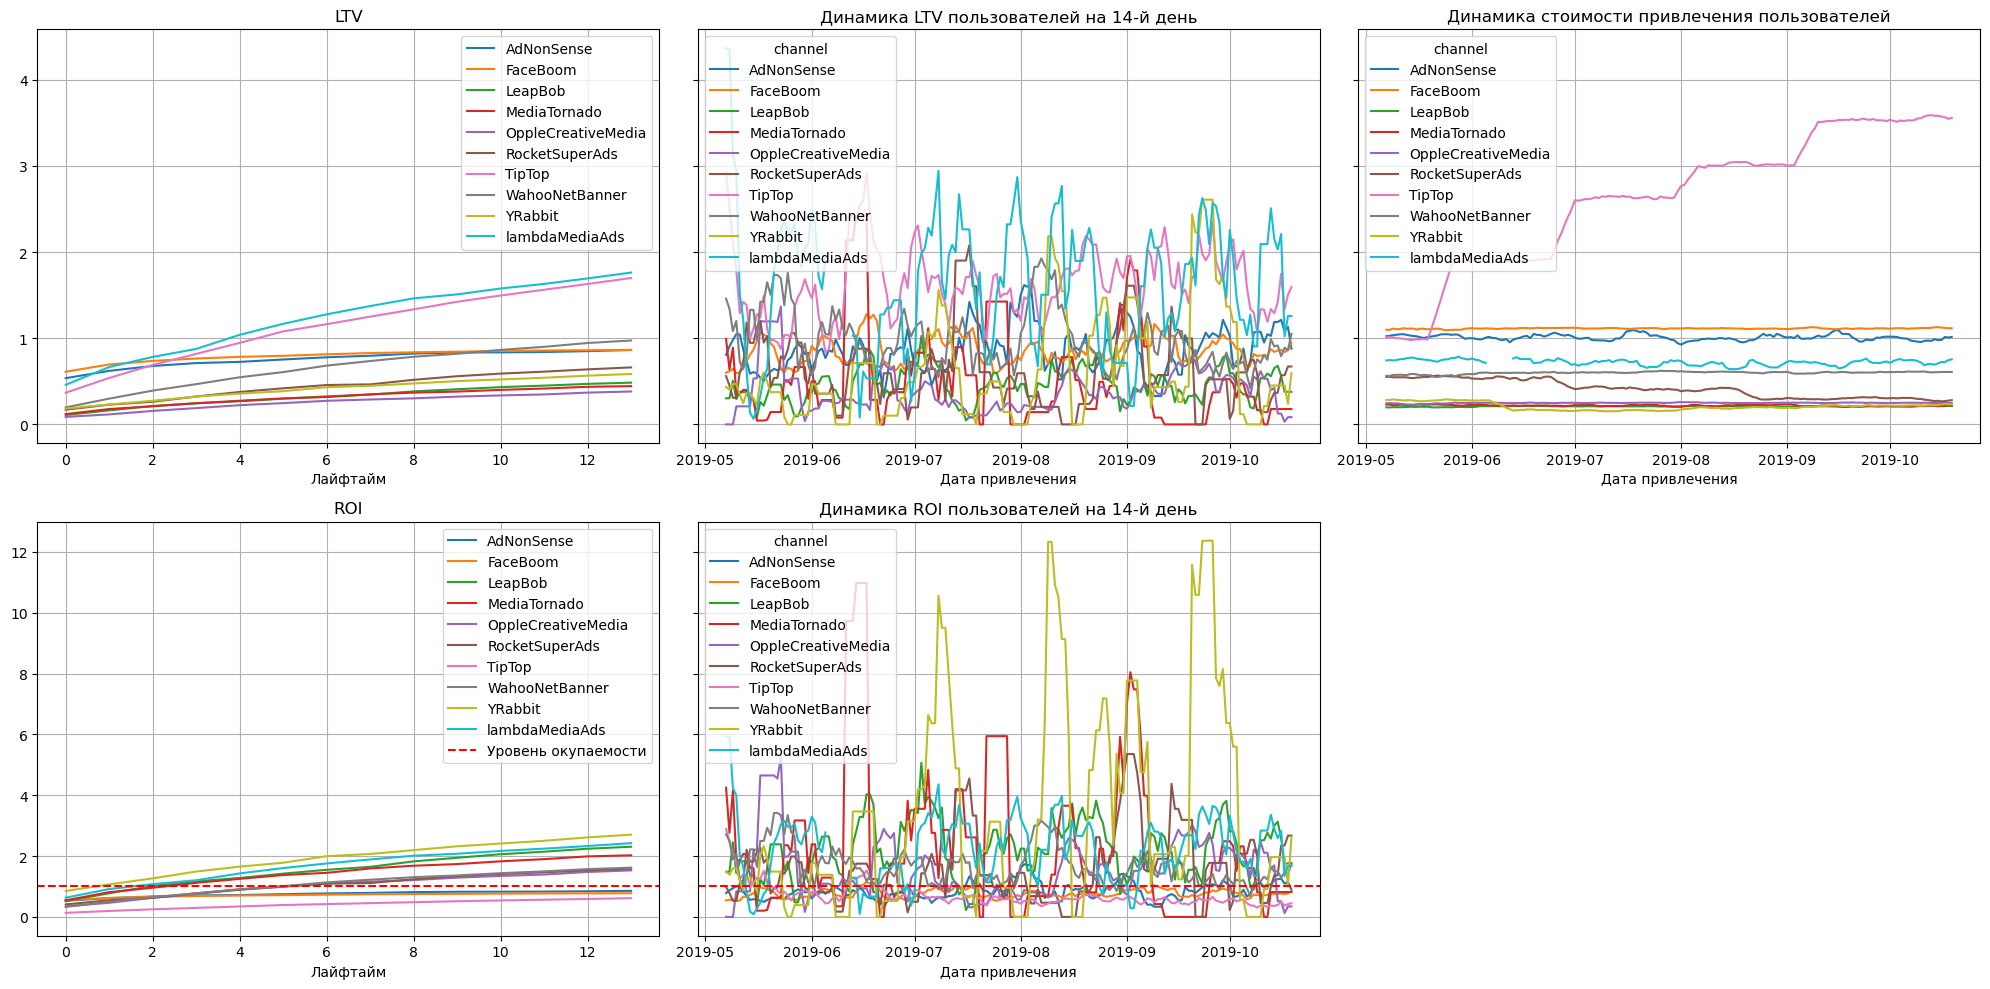

In [70]:
dimensions = ['channel']
device_l = ['Android','PC']
profiles_l = profiles.query('device.isin(@device_l)')

# считаем LTV и ROI с помощью функции get_ltv()
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_l, orders, observation_date, horizon_days, dimensions=dimensions
)
# строим графики с помощью функции plot_ltv_roi()
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

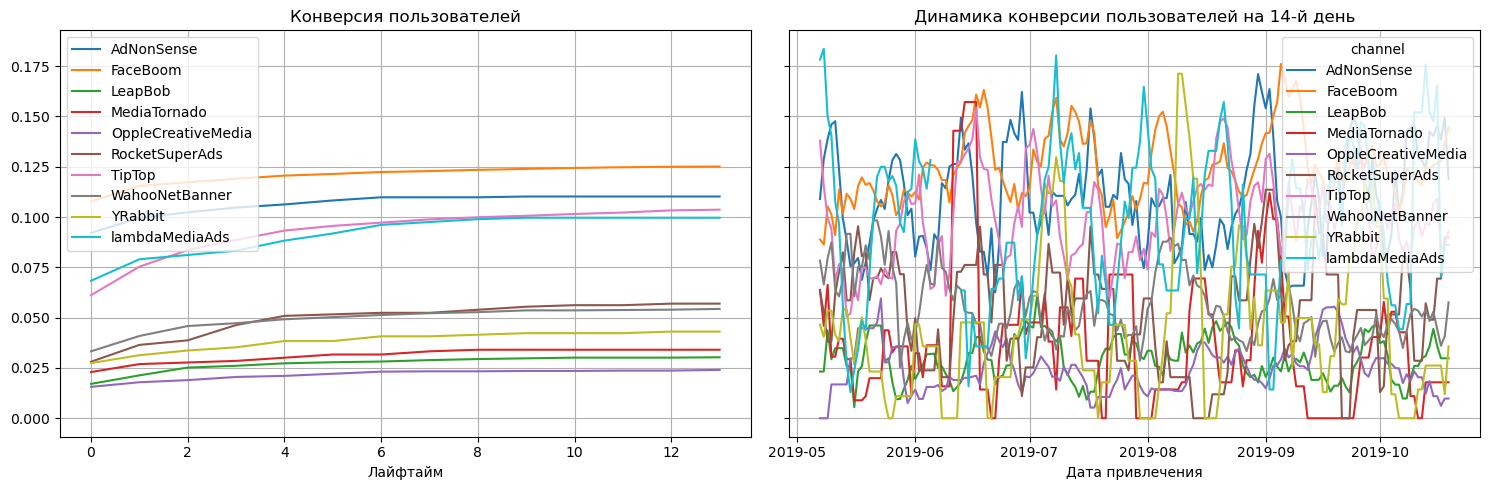

In [71]:
# смотрим конверсию с разбивкой по каналам с помощью функции get_conversion()

dimensions = ['channel']

conversion_raw, conversion, conversion_history = get_conversion(
    profiles_l, orders, observation_date, horizon_days, dimensions=dimensions)

# Построим графики конверсии
plot_conversion(conversion, conversion_history, horizon_days)

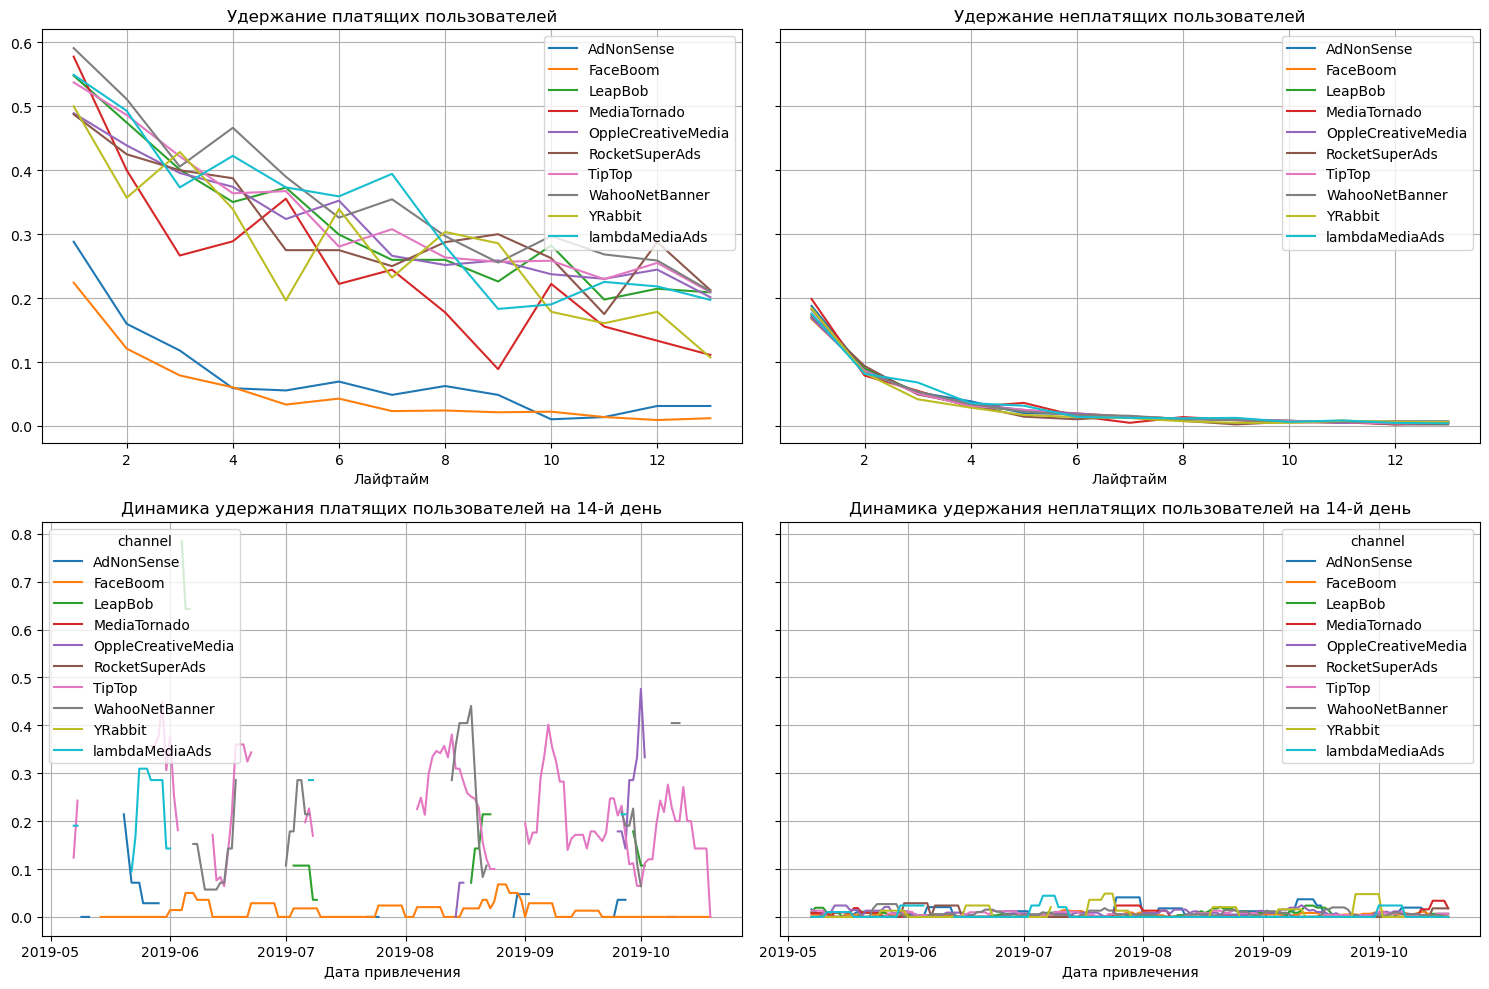

In [72]:
dimensions = ['channel']
# найдем удержание с помощью функции get_retention()
retention_raw, retention, retention_history = get_retention(
    profiles_l, visits, observation_date, horizon_days, dimensions=dimensions
)

# Построим графики удержания
plot_retention(retention, retention_history, horizon_days)

**Вывод:**

Для 'Android' и 'PC' не окупаются рекламные каналы TipTop, FaceBoom и AdNonSense, хоршие показатели у YRabbit, lambdaMediaAds и LeapBob. 
Лучшая конверсия у FaceBoom, lambdaMediaAds, AdNonSense и TipTop. Самое худшее удердание у FaceBoom и AdNonSense, остальные примерно одинаковые.

**Вывод по разделу:** 
Реклама, направленная на привлечение пользователей в целом не окупается.

Негативное влияние на окупаемость рекламы оказывают: 
- устройства iPhone и Mac,
- страна Соединенные Штаты Америки,
- рекламные каналы AdNonSense, FaceBoom, TipTop.

Причины проблем окупаемости: 

- Плохое удержание у пользователей Mac и iPhone, хотя конверсия у них самая высокая (9%)
- Плохое удержание у пользователей из США, хотя конверсия у них почти в 2 раза выше остальных стран (10%)
- Плохое удержание у пользователей из рекламных источников FaceBoom и AdNonSense, показатель на четырнадцатый день жизни стремится к нулю
- Большие вложения в канал TipTop

Рекомендации для рекламного отдела:

Следует обратить внимание на другие окупающиеся каналы привлечения пользователей для кадой страны и устройства отдельно.


## Общий вывод

### Вывод

<a id="18-bullet"></a>

**В ходе проекта мы исcледовали данные о пользователях развлекательного приложения Procrastinate Pro+, привлечённых с 1 мая по 27 октября 2019 года. Необходимо было выявить причины неэффективности привлечения пользователей и дать рекомендации отделу маркетинга.**


Причины неэффективности привлечения пользователей:

- реклама в США - проблема в низком удержаним пользователей
- устройства iPhone и Mac - проблема в низком удержаним пользователей и увеличении стоимости привлечения пользователей
- устройство PC - низкая коверсия пользователей
- канал TipTop - увеличение стоимости привлечения пользователей
- канал FaceBoom, AdNonSense - проблемы с удержаним пользователей

Рекомендации отделу маркетинга:

- Чтобы оптимизировать затраты на рекламу в **США** необходимо обратить внимание на такие окупающиеся источники, как MediaTornado и RocketSuperAds.

- Чтобы оптимизировать затраты на рекламу в **Европе** необходимо обратить внимание на такие окупающиеся источники, как lambdaMediaAds и LeapBob.

- Для пользователей **Mac и iPhone** перспективными каналами являются  MediaTornado, lambdaMediaAds

- Для пользователей **Android и PC** перспективными каналами являются lambdaMediaAds и LeapBob. 

- Не рекомендую вкладываться в канал Yrabbit. 

Канал сейчас окупается, потому что там низкий CAC. Фактически мы сейчас сильно много не платим за новых клиентов (CAC = 0,21) . И уже на этих клиентах (которые обошлись нам недорого) мы сможем спрогнозировать будущую картину. Они имеют низкую конвертируемость и сильно падающее удержание на последних днях горизонта. Т.е. можно сделать вывод, что им не интересно наше приложение. Возможно, это просто не наша аудитория. Они не заинтересованы в нашем приложении
